# Temoa Simulation Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_parser import get_output_files, make_capacity_plots, make_emissions_plots
from data_parser import get_scenario_name, parse_datalines, create_dataframe, create_column
from data_parser import data_by_tech, data_by_variable, data_by_year
from data_parser import variables, time_horizon, get_total

## Business As Usual

* Nuclear reactors shutdown prematurely.
* There is no constraint on carbon or other greenhouse gas emissions.

In [2]:
file_list = get_output_files()
file_list.sort()
file_list

['./advanced-nuclear/data_files/AN1_IL_AN1_model/AN1_OutputLog.log',
 './advanced-nuclear/data_files/AN2_IL_AN2_model/AN2_OutputLog.log',
 './advanced-nuclear/data_files/AN3_IL_AN3_model/AN3_OutputLog.log',
 './steady-demand/data_files/BAU_IL_bau_model/bau_OutputLog.log',
 './steady-demand/data_files/SD2_IL_SD2_model/SD2_OutputLog.log',
 './steady-demand/data_files/SD3_IL_SD3_model/SD3_OutputLog.log',
 './steady-demand/data_files/SD4_IL_SD4_model/SD4_OutputLog.log',
 './steady-demand/data_files/SD5_IL_SD5_model/SD5_OutputLog.log',
 './steady-demand/data_files/SD6_IL_SD6_model/SD6_OutputLog.log']

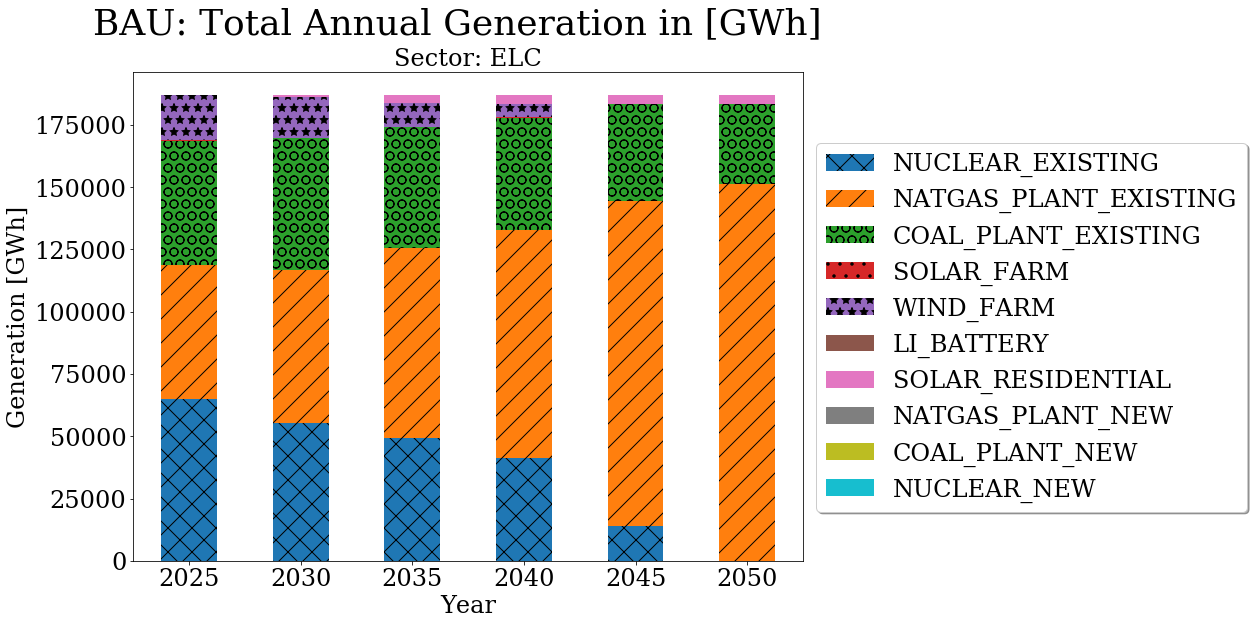

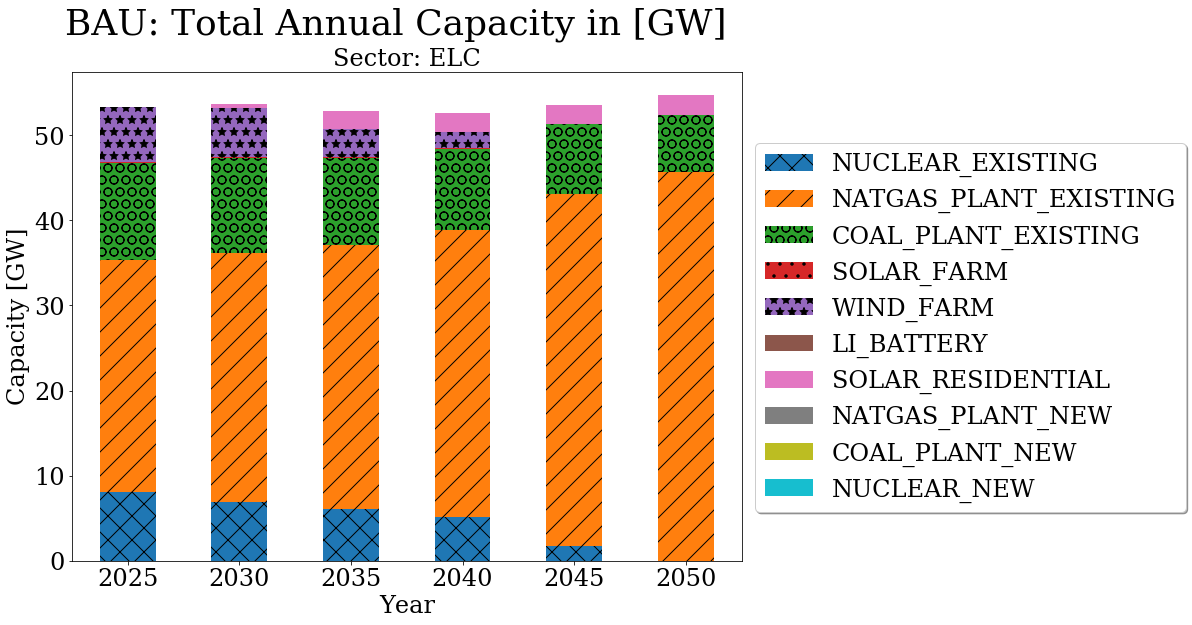

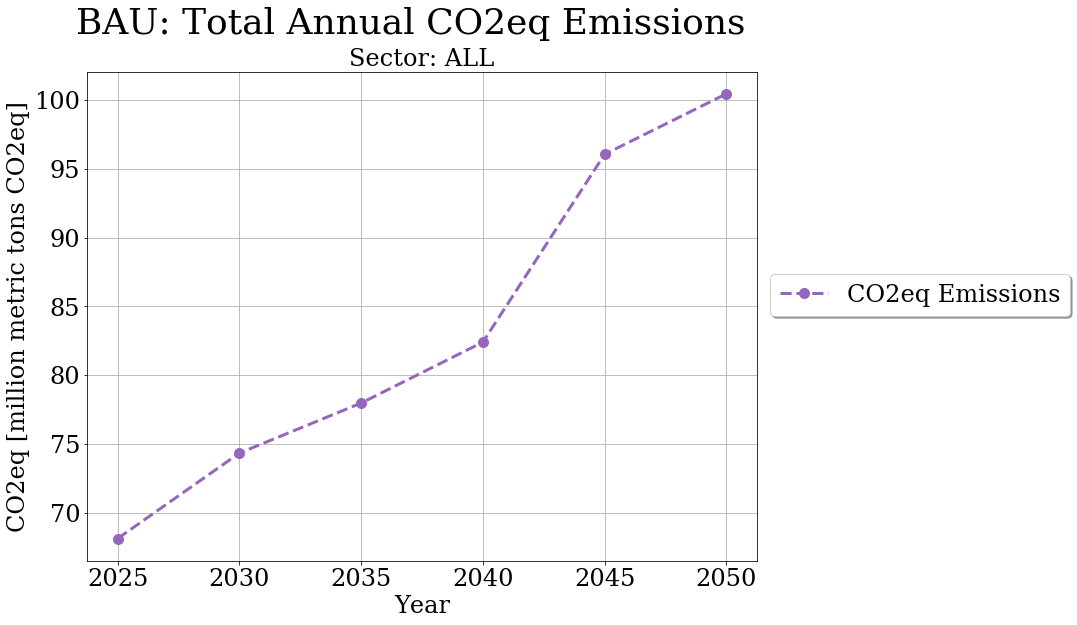

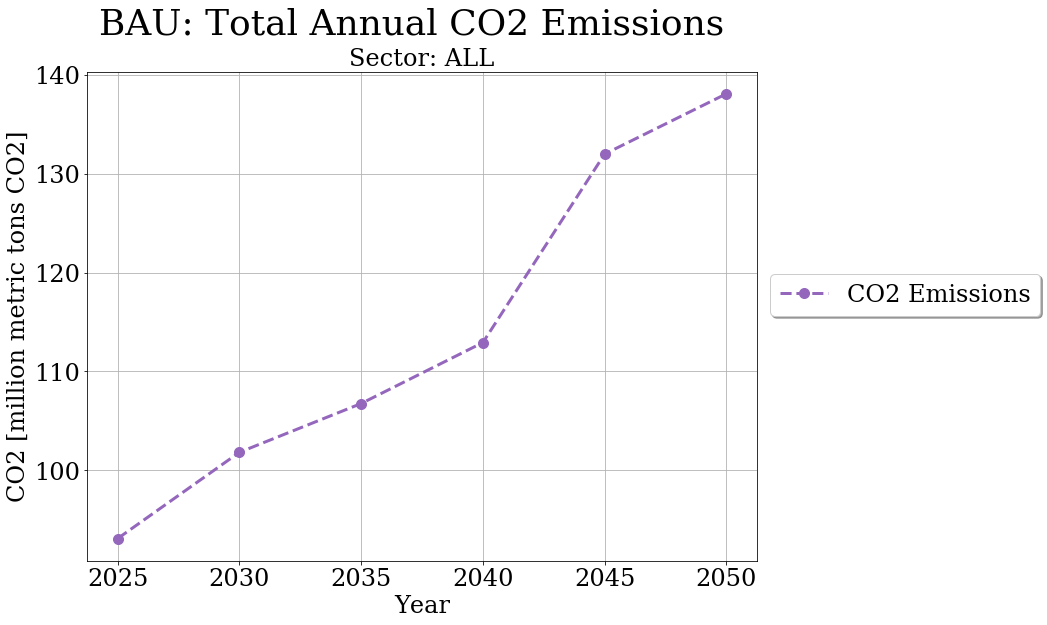

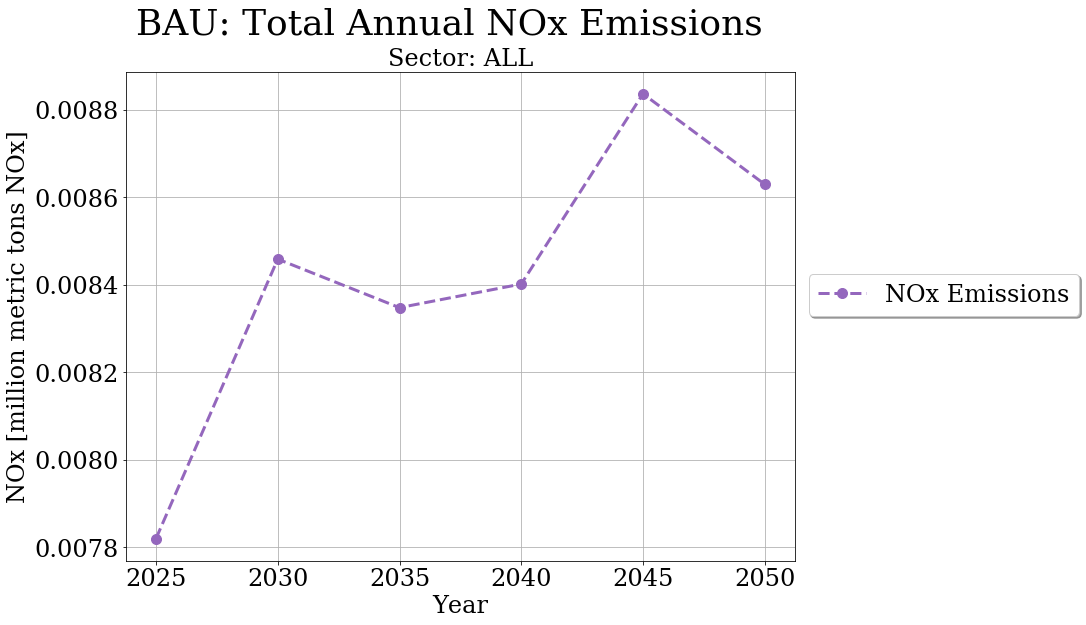

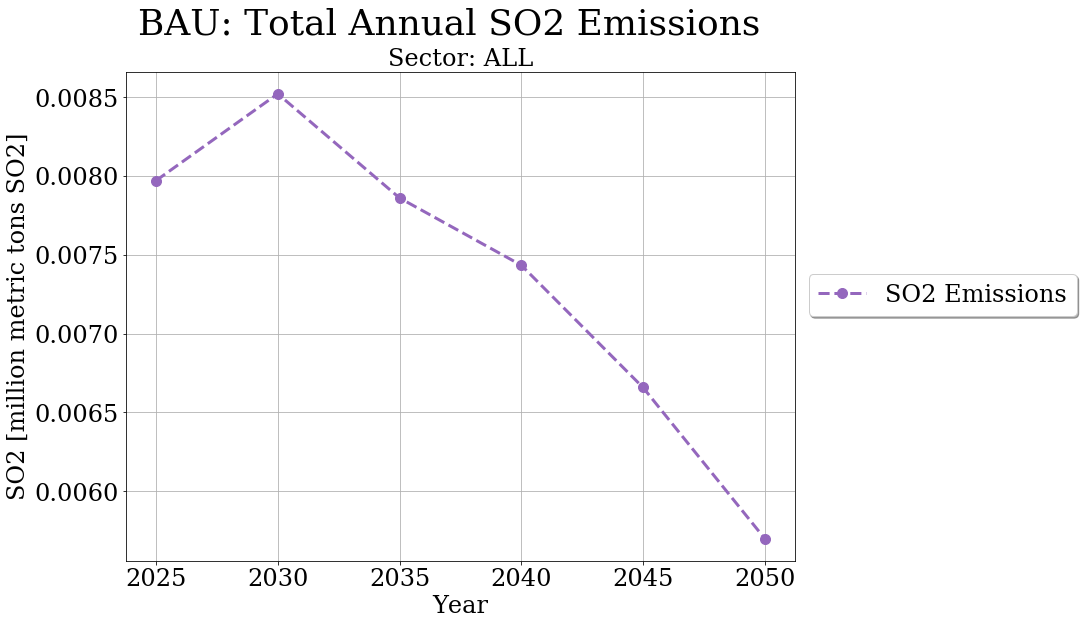

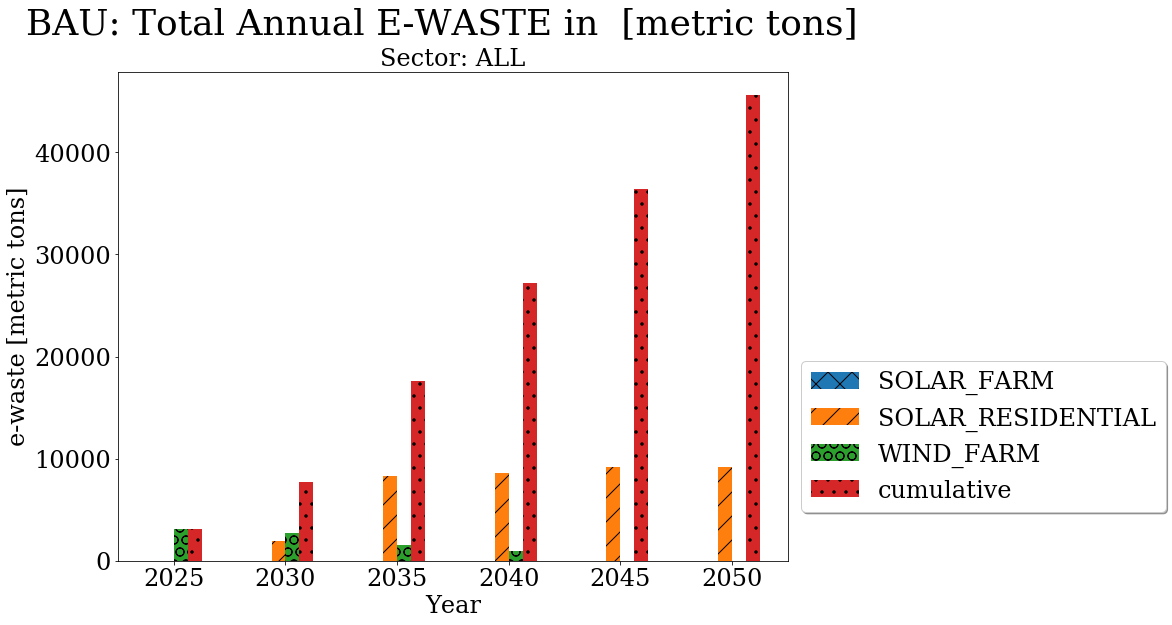

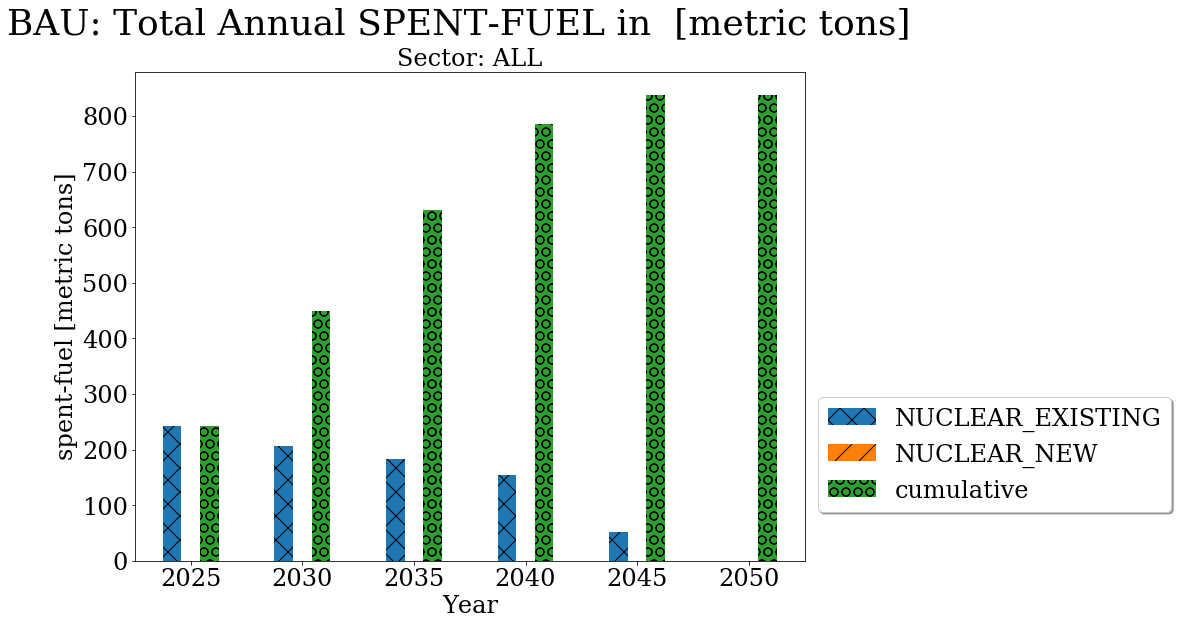

In [3]:
scenario = 'bau'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)        

## Scenario: SD2

* Nuclear Plants Shutdown At the end of their current licenses.
* There is no constraint on carbon emissions

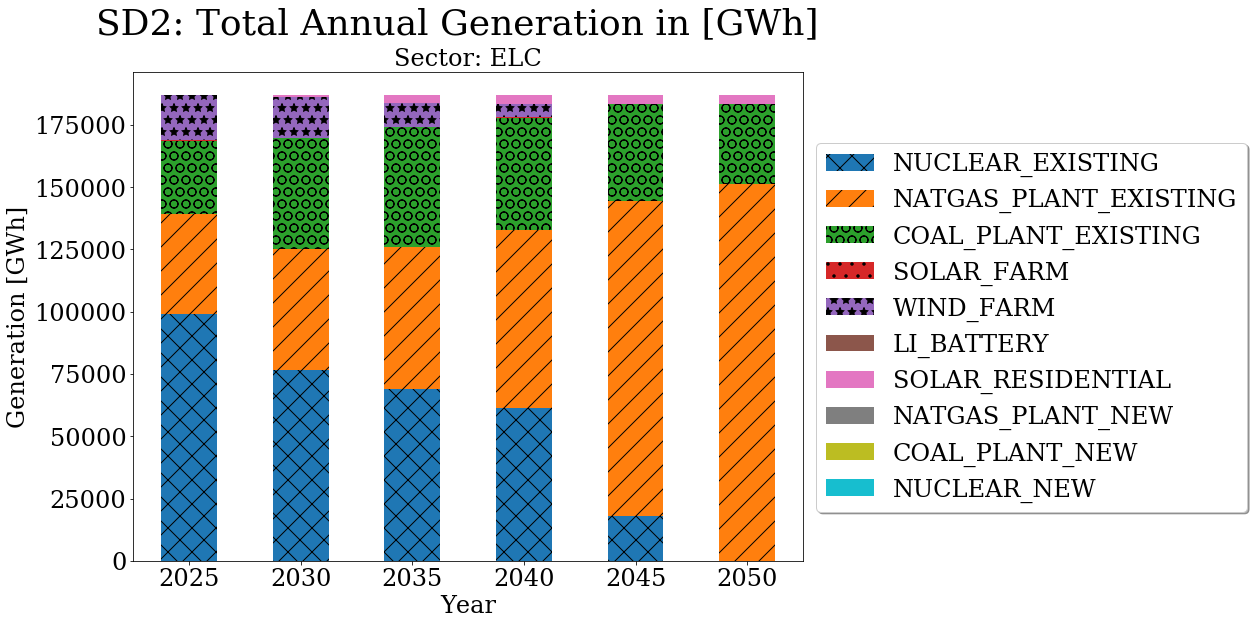

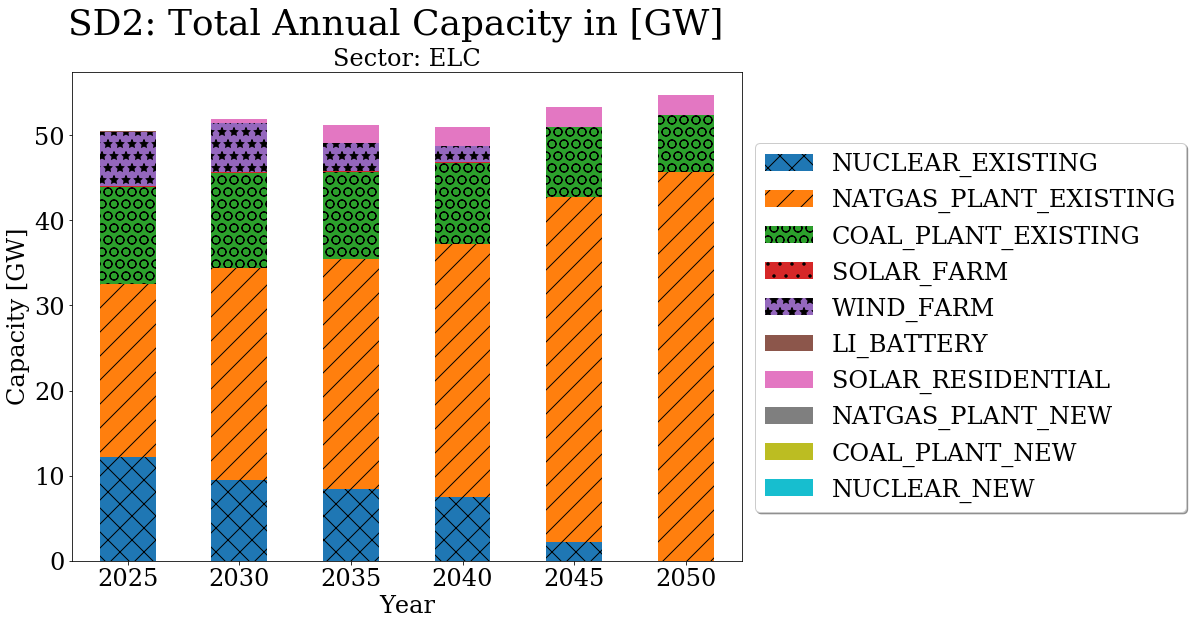

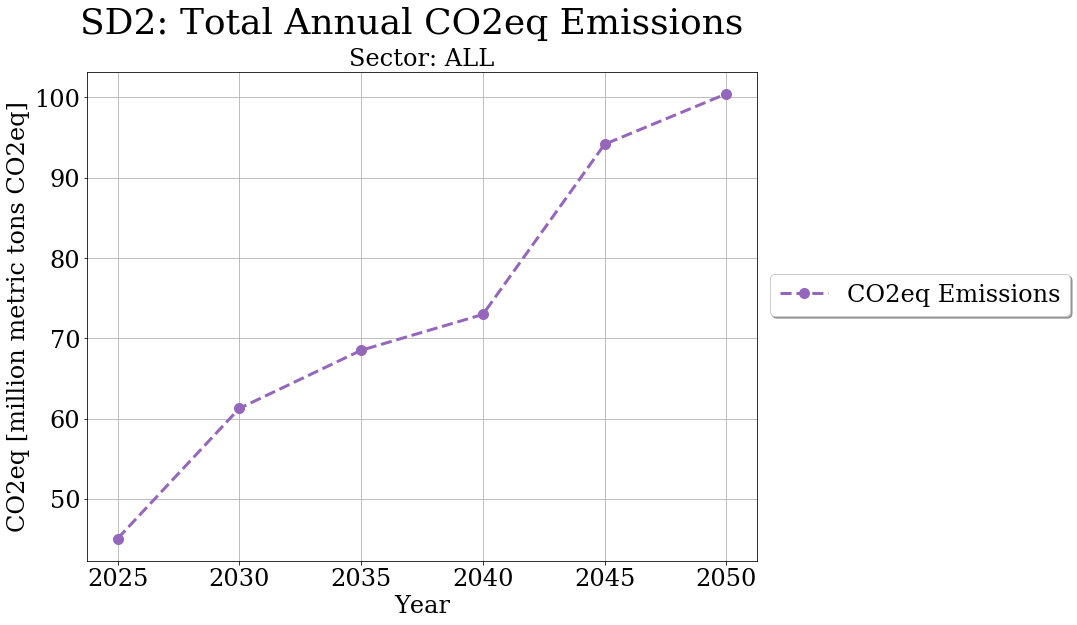

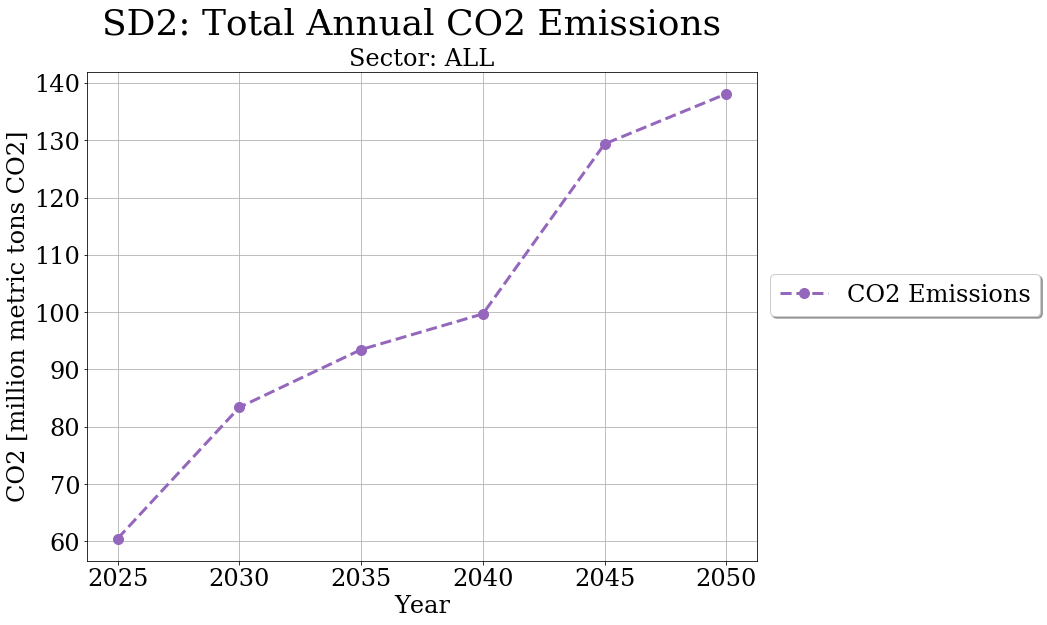

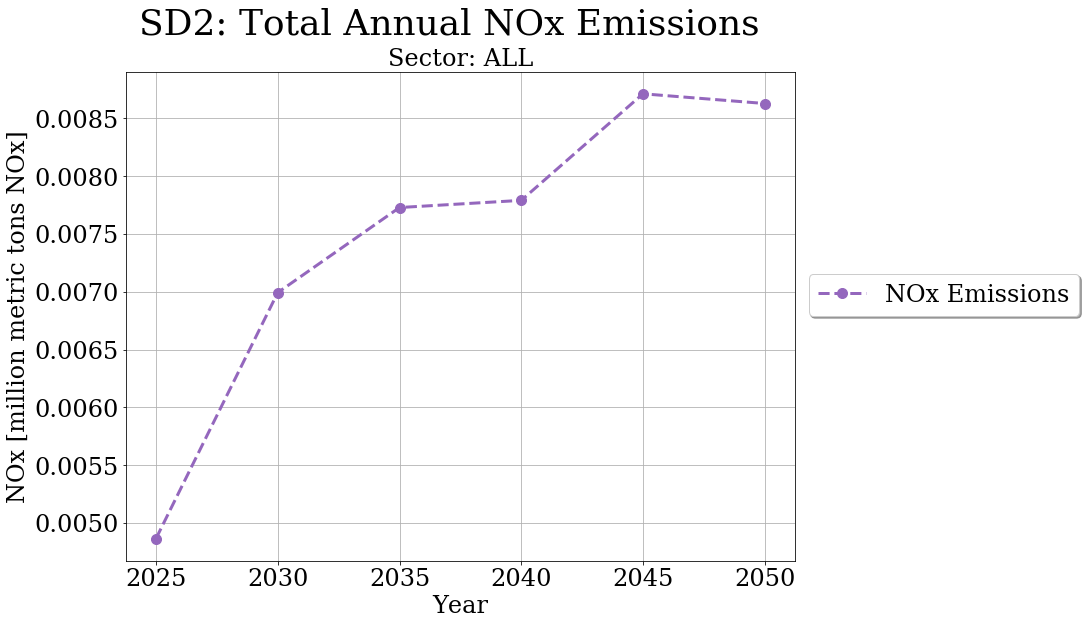

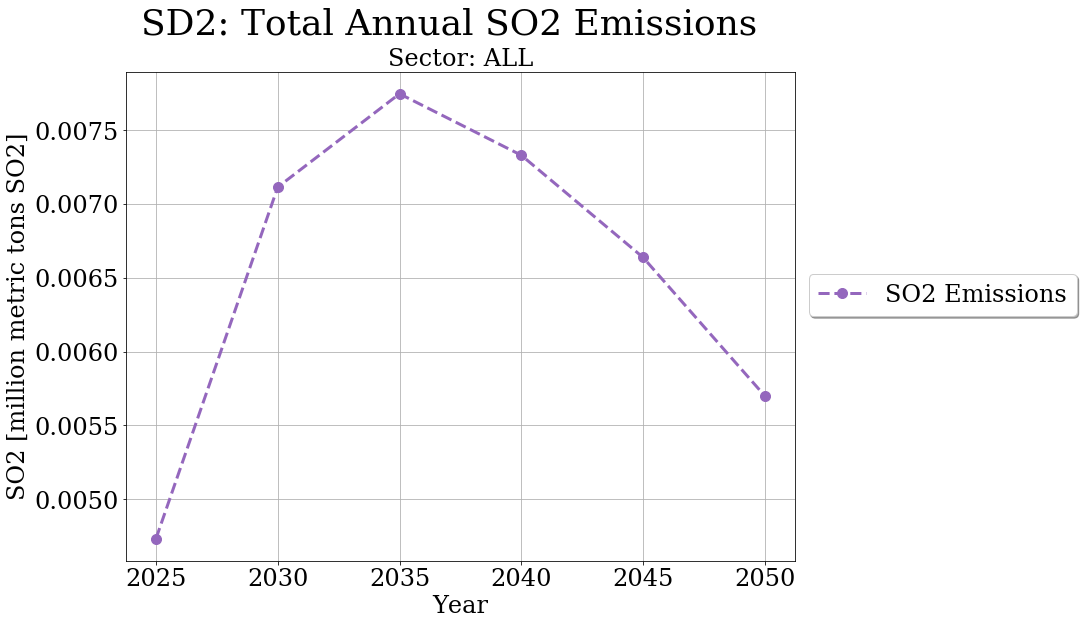

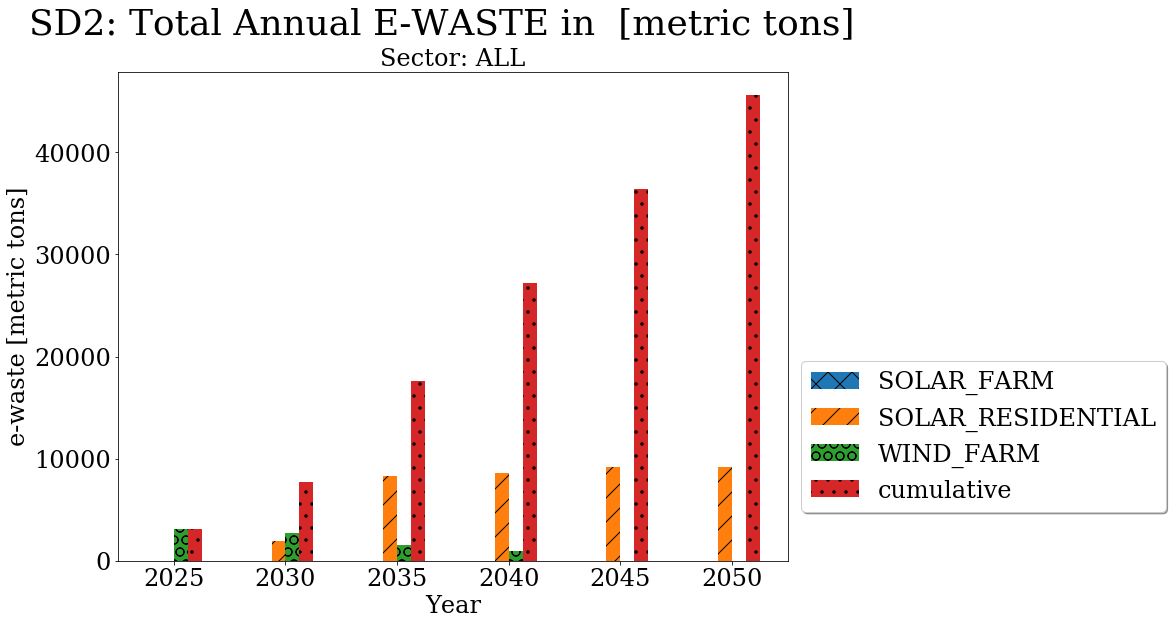

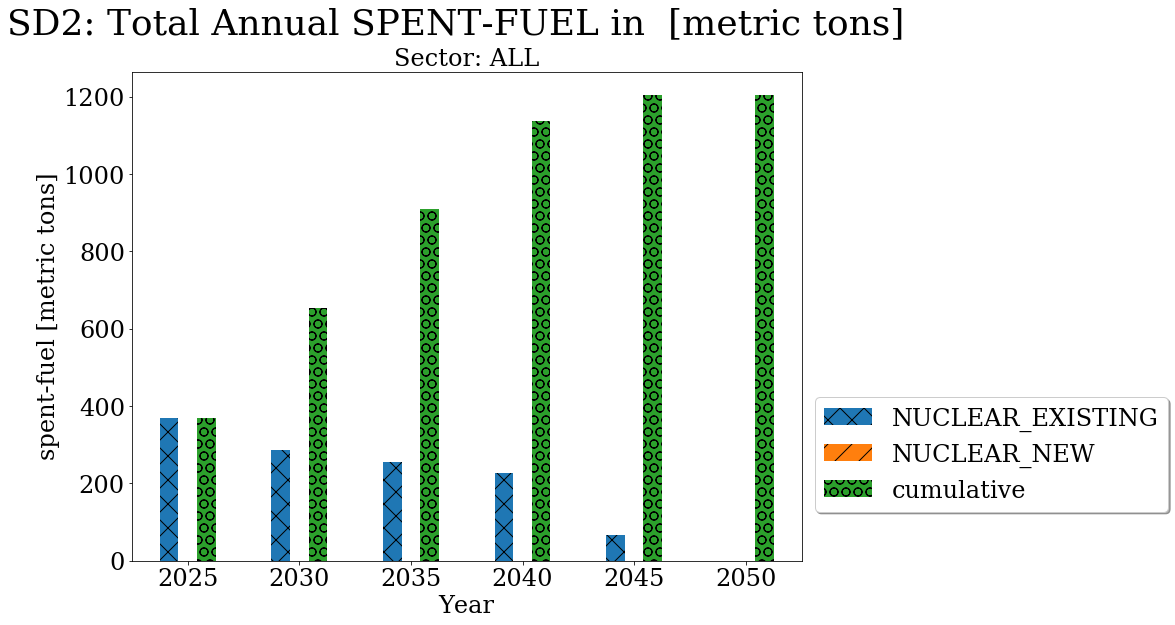

In [4]:
scenario = 'SD2'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)  

## Scenario: SD3

* Nuclear plants remain open through 2050.
* There is no constraint on carbon or other greenhouse gas emissions.

Objective Function Values: 119265.34401 million dollars

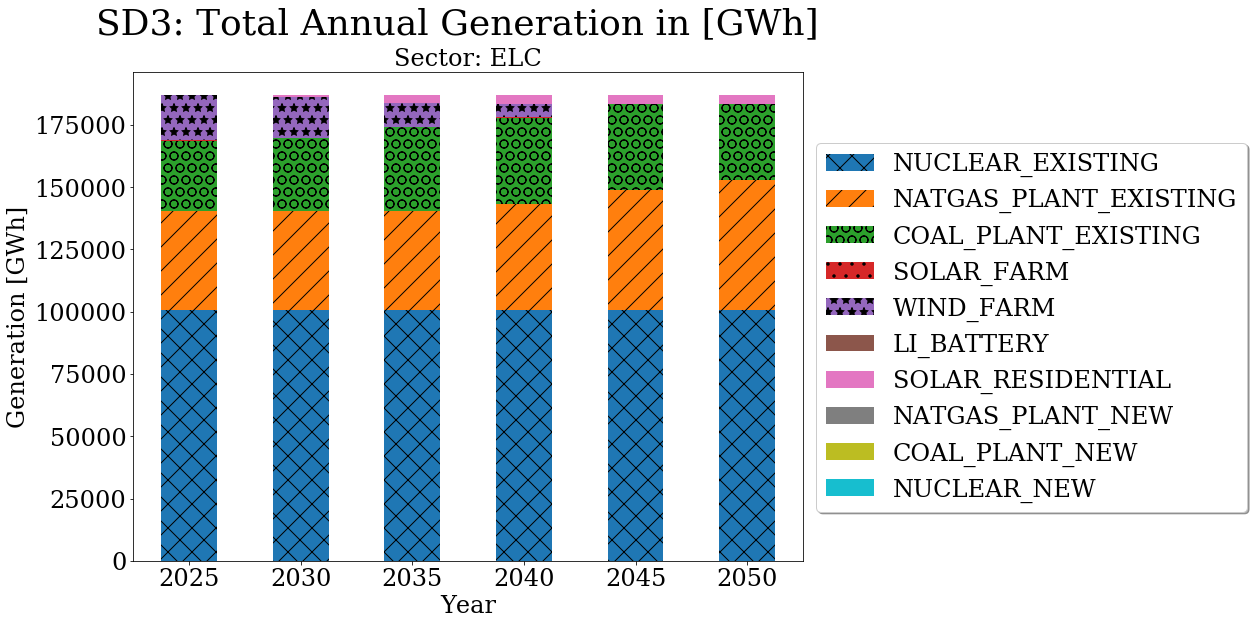

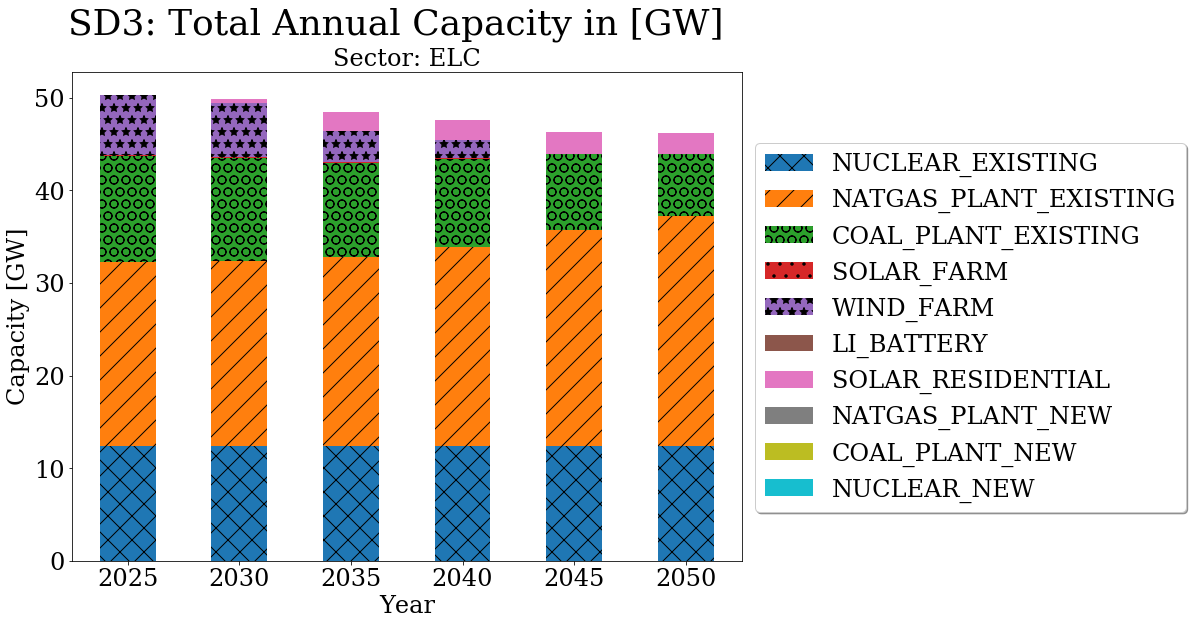

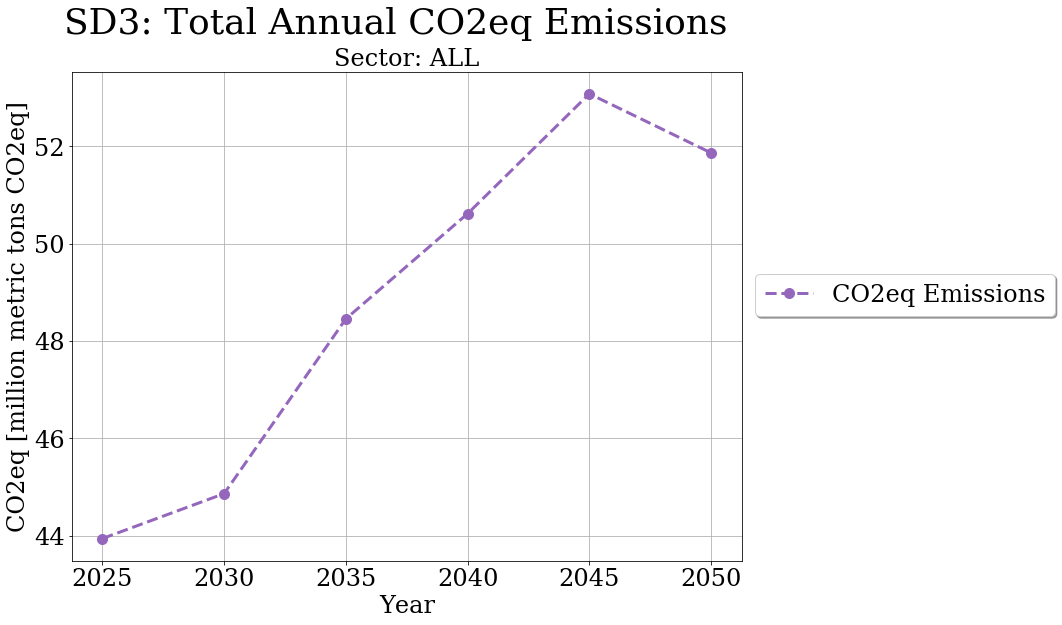

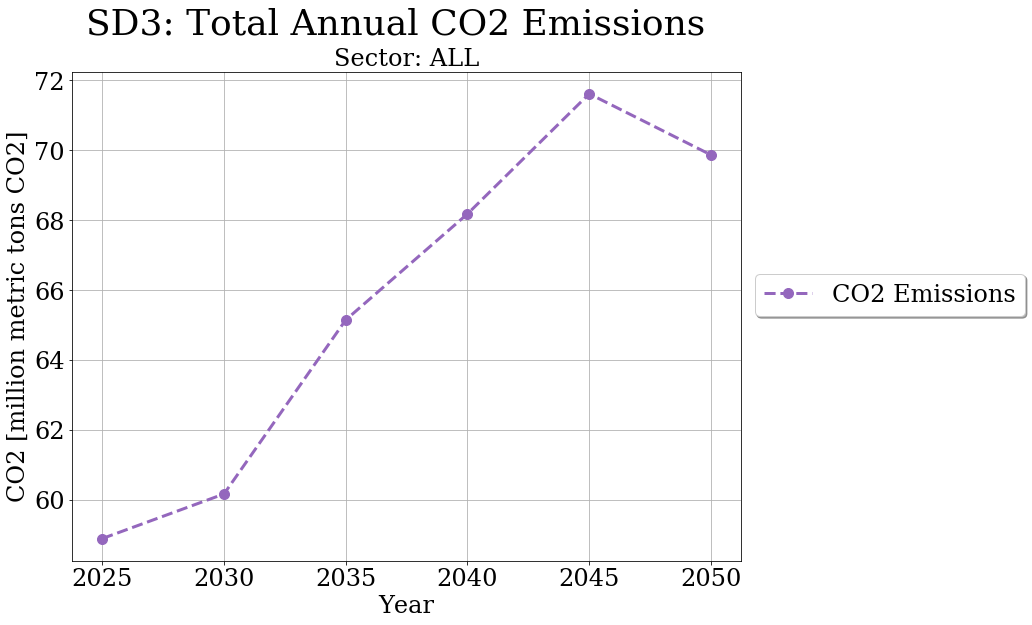

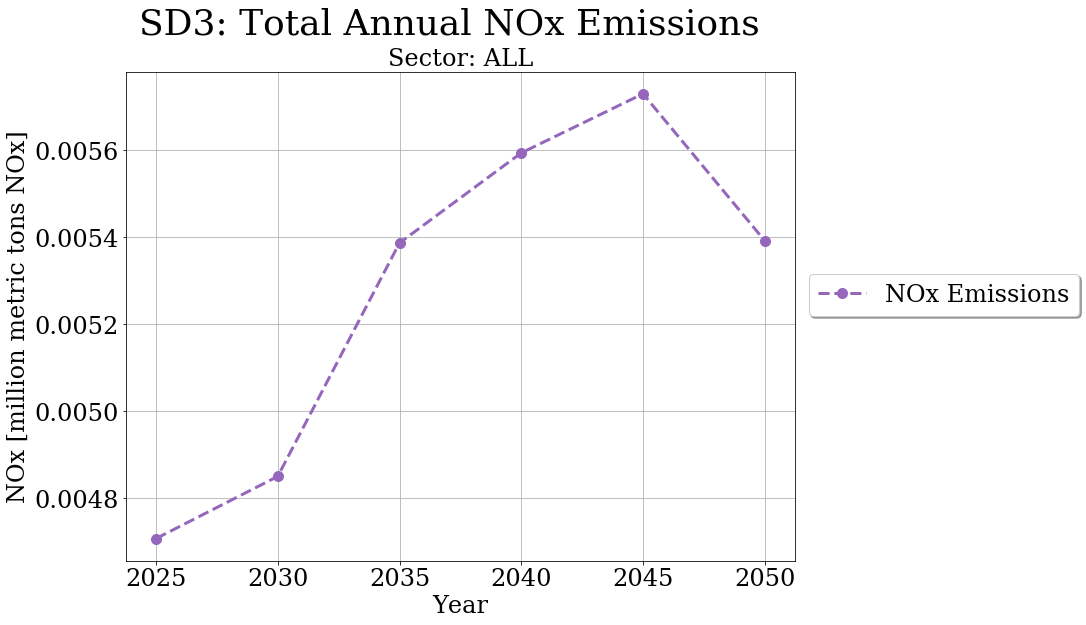

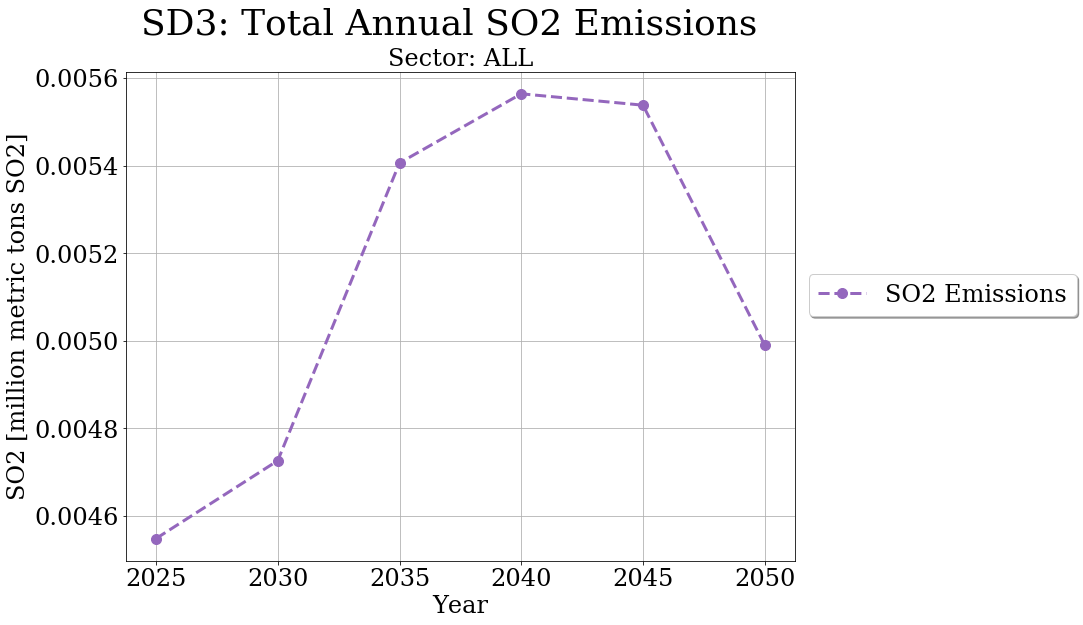

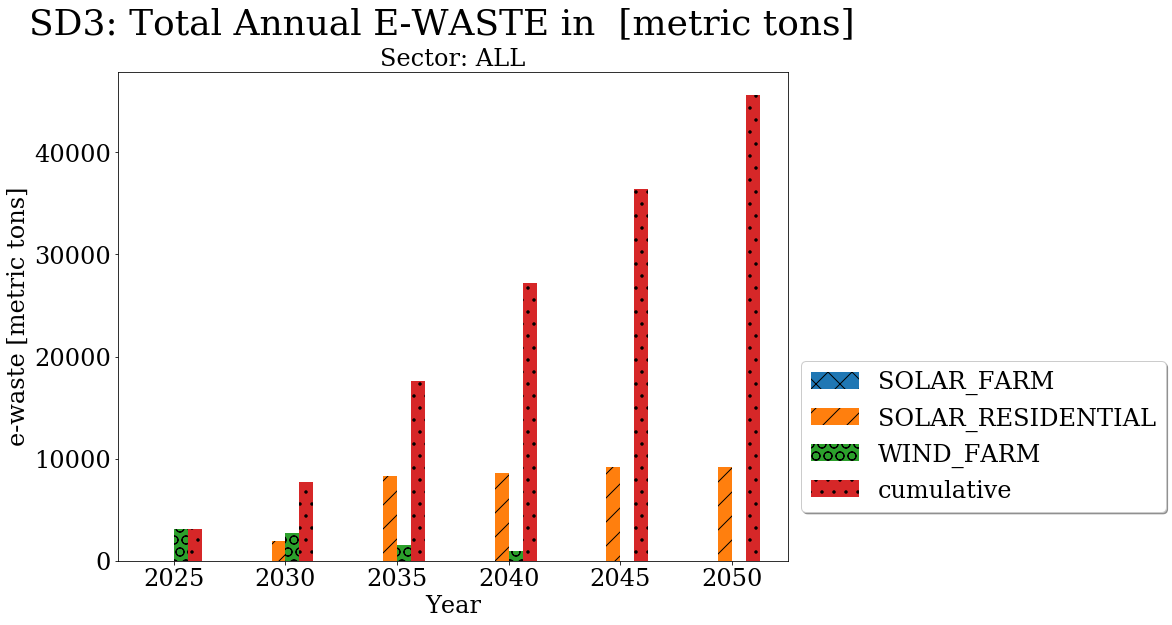

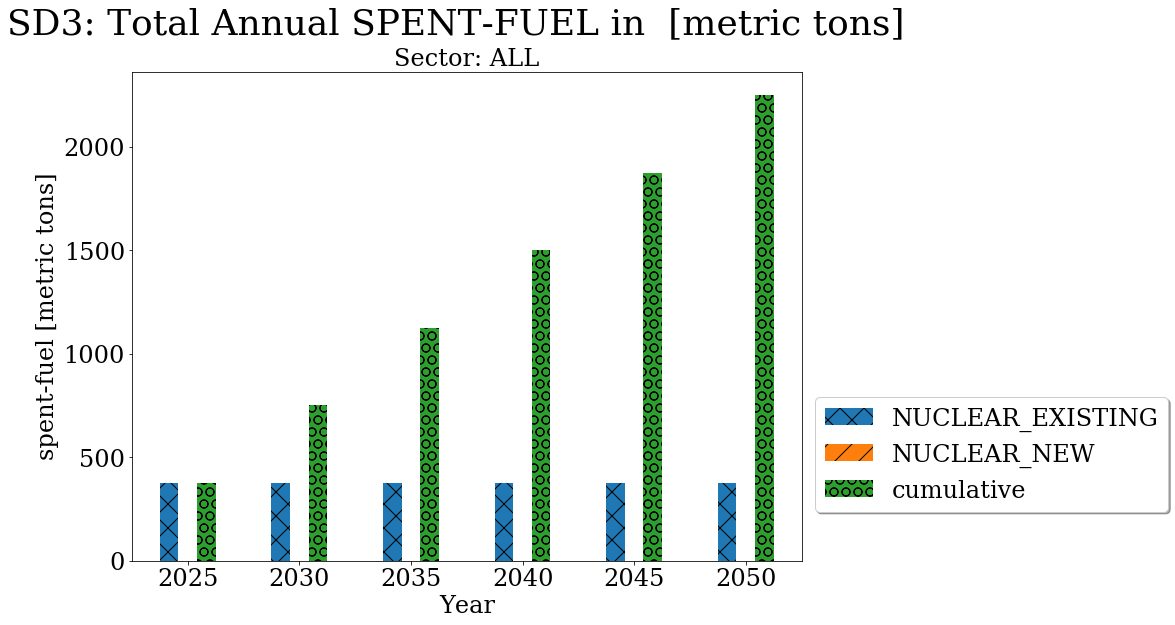

In [5]:
scenario = 'SD3'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)  

## Scenario: SD4

* Nuclear plants shutdown prematurely. 
* Zero carbon emissions allowed by 2030

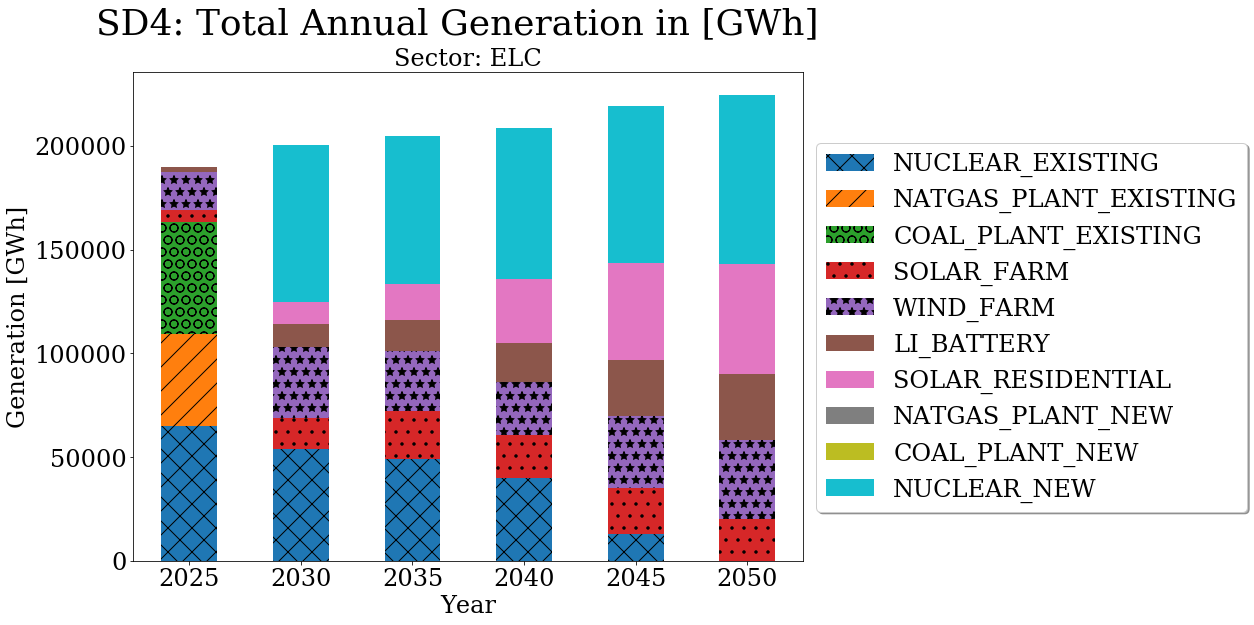

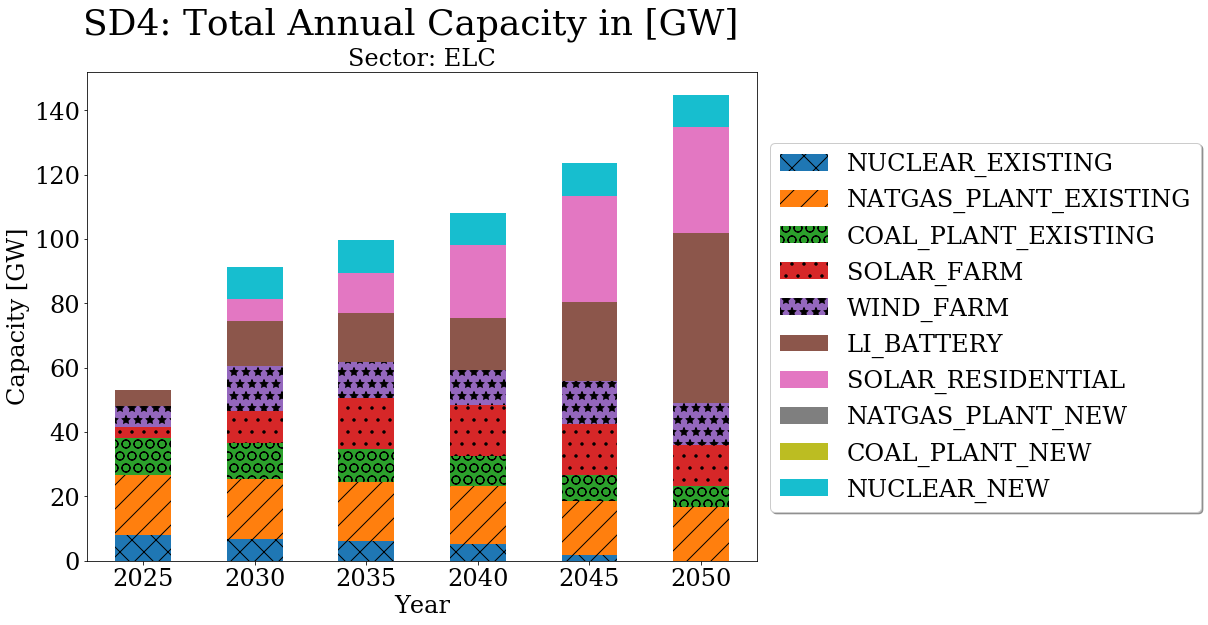

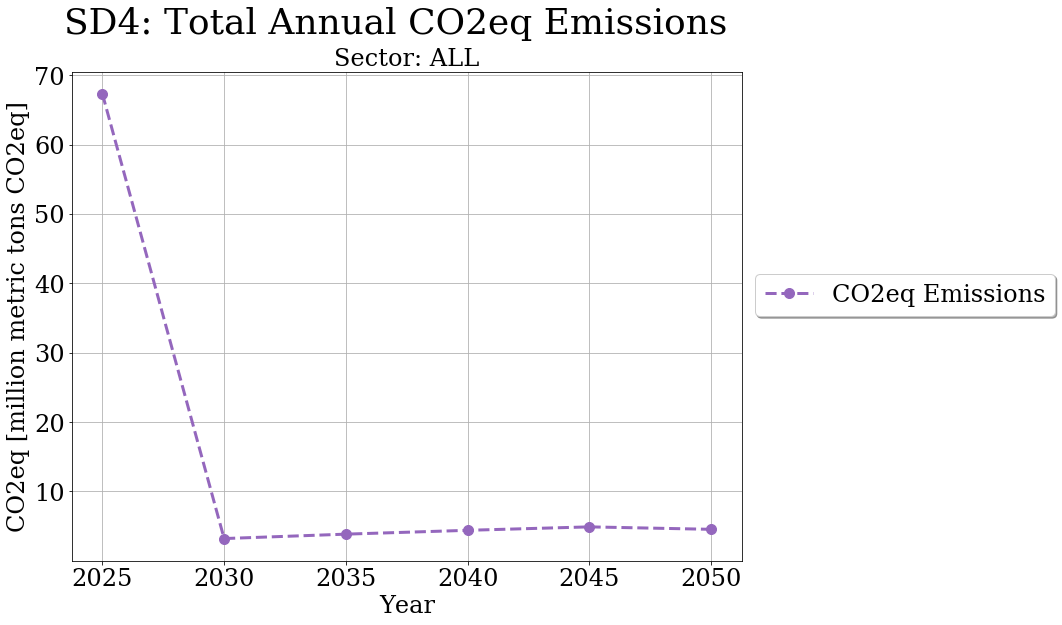

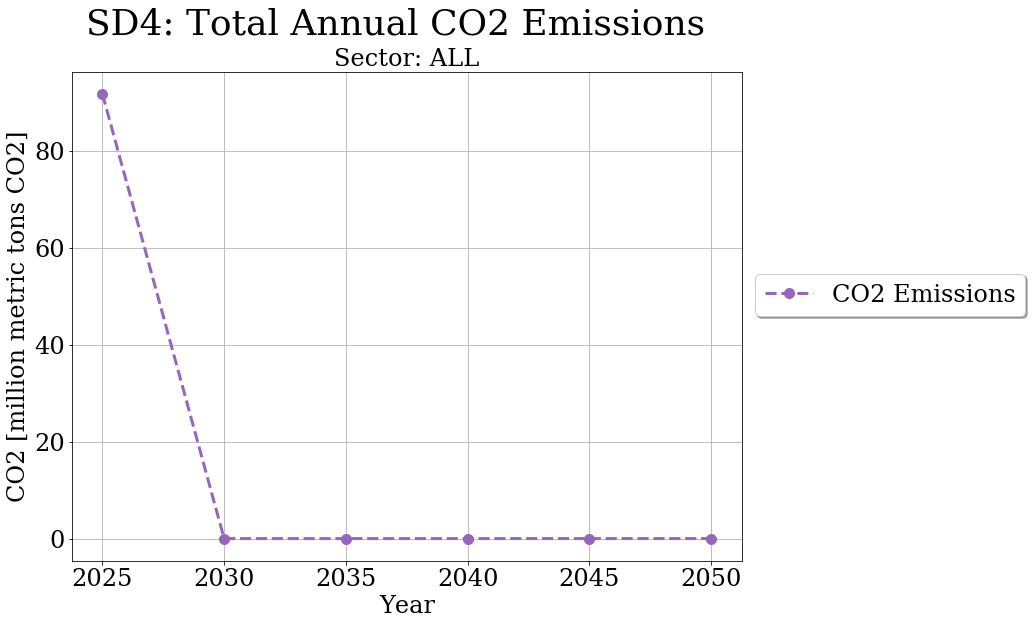

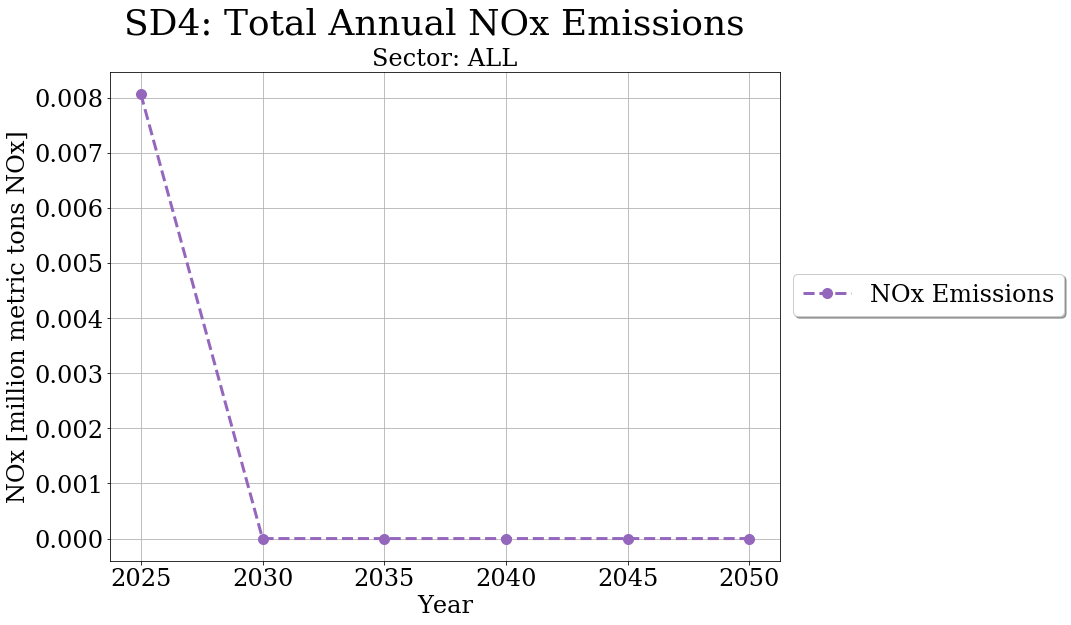

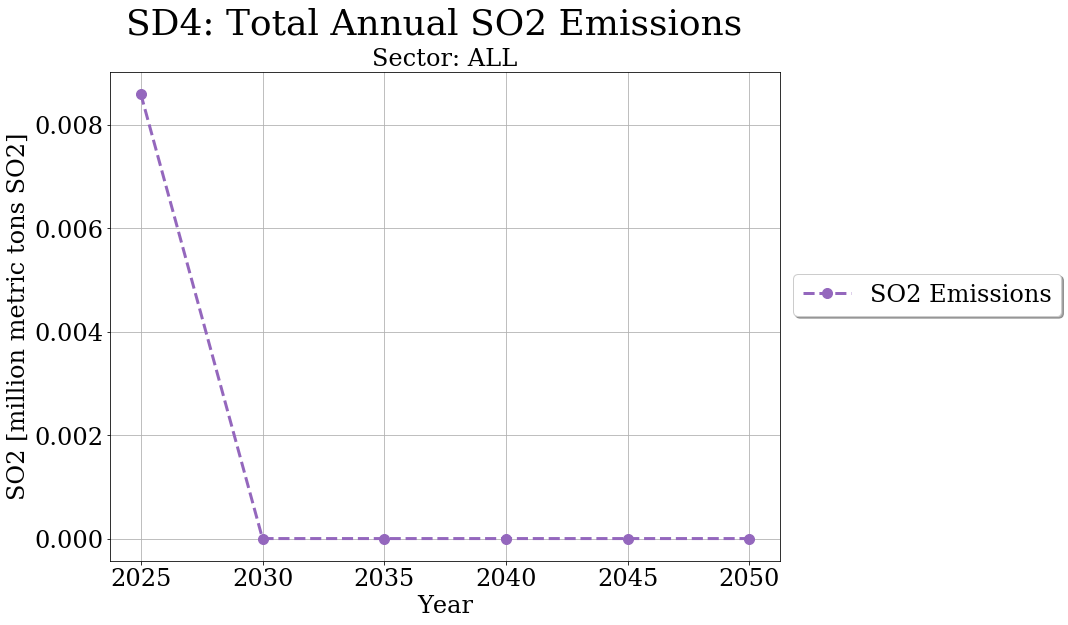

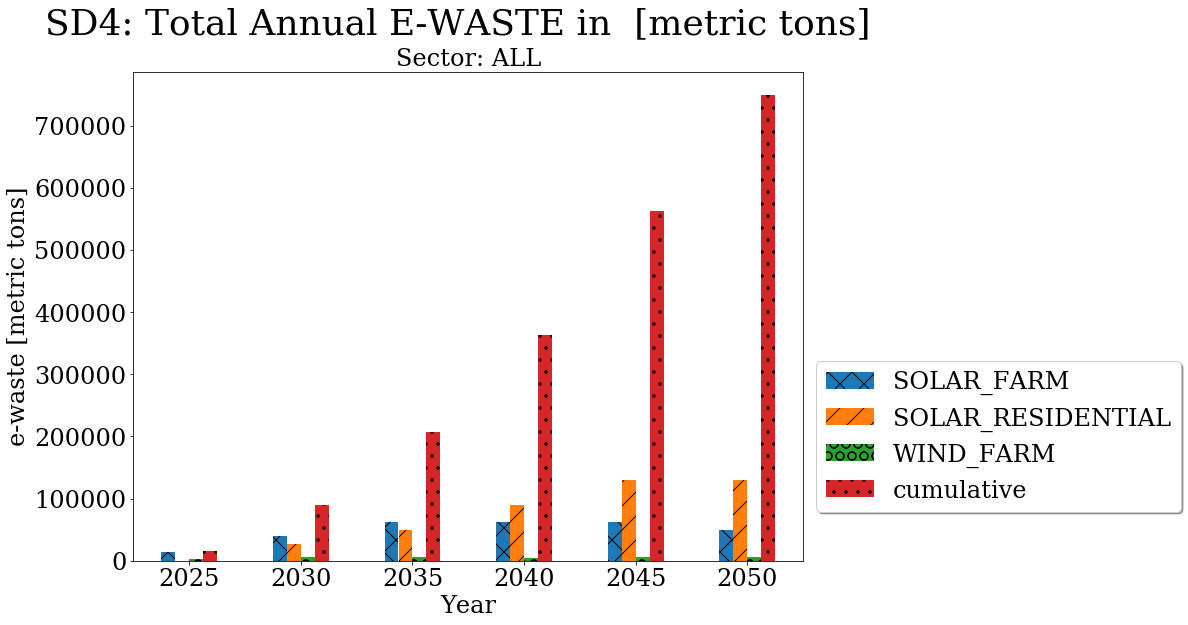

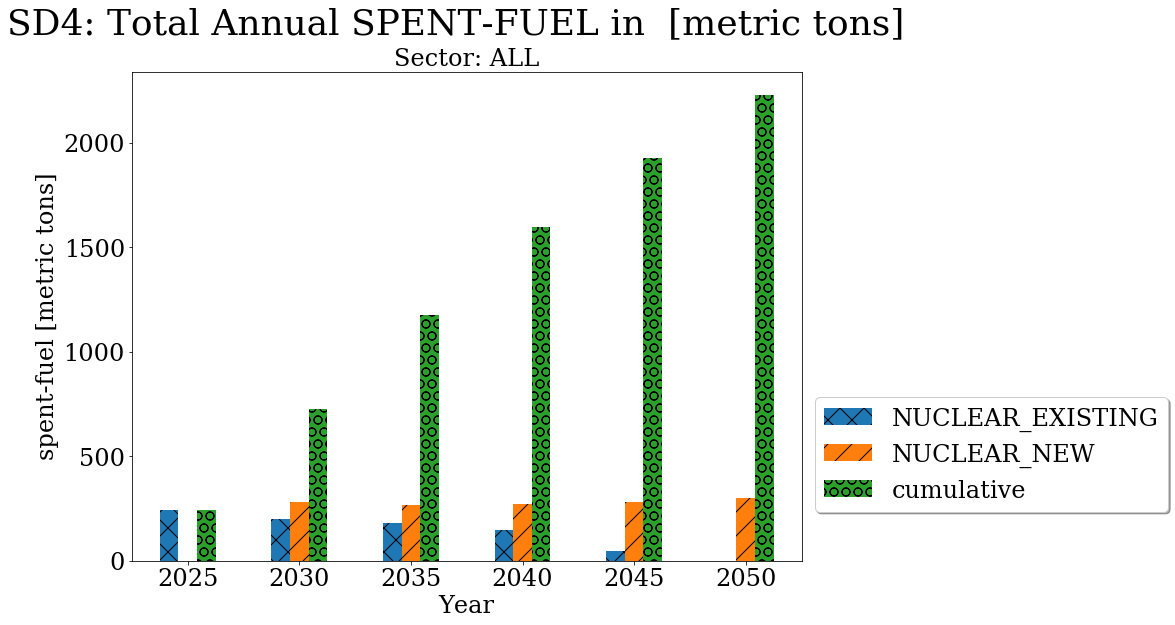

In [32]:
scenario = 'SD4'
scenario_list = [f for f in file_list if scenario in f]
sd4_dfs = make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False) 

## Scenario: SD5

* Nuclear plants shutdown at the end of their current license extensions.
* Zero carbon emissions allowed by 2030

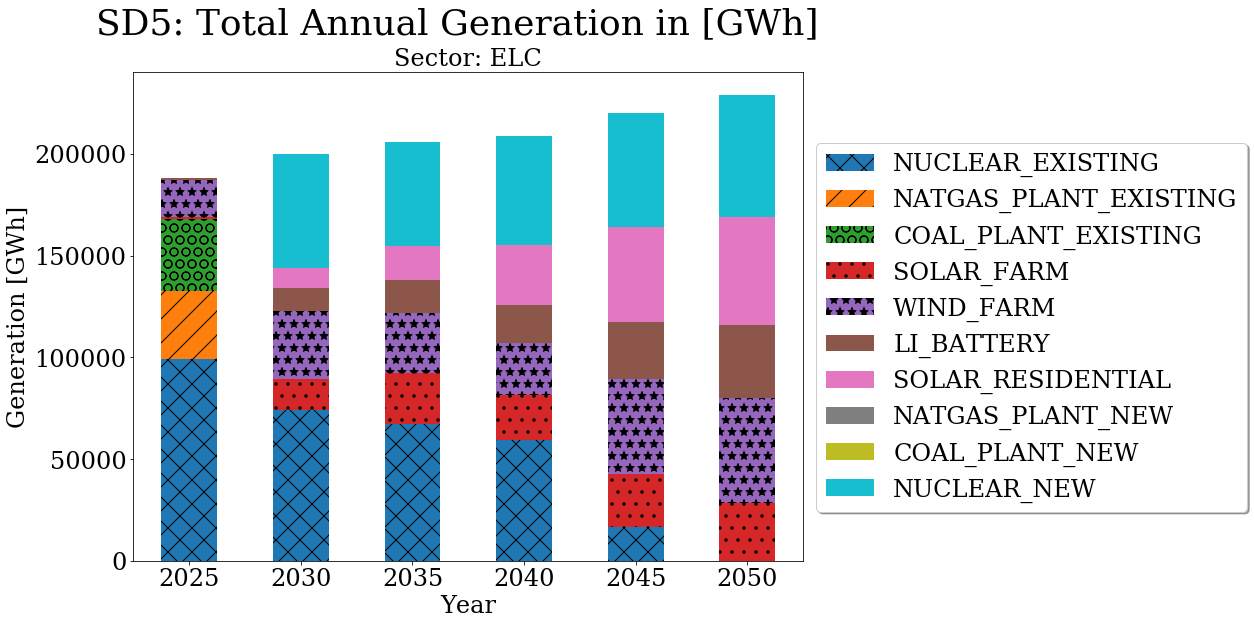

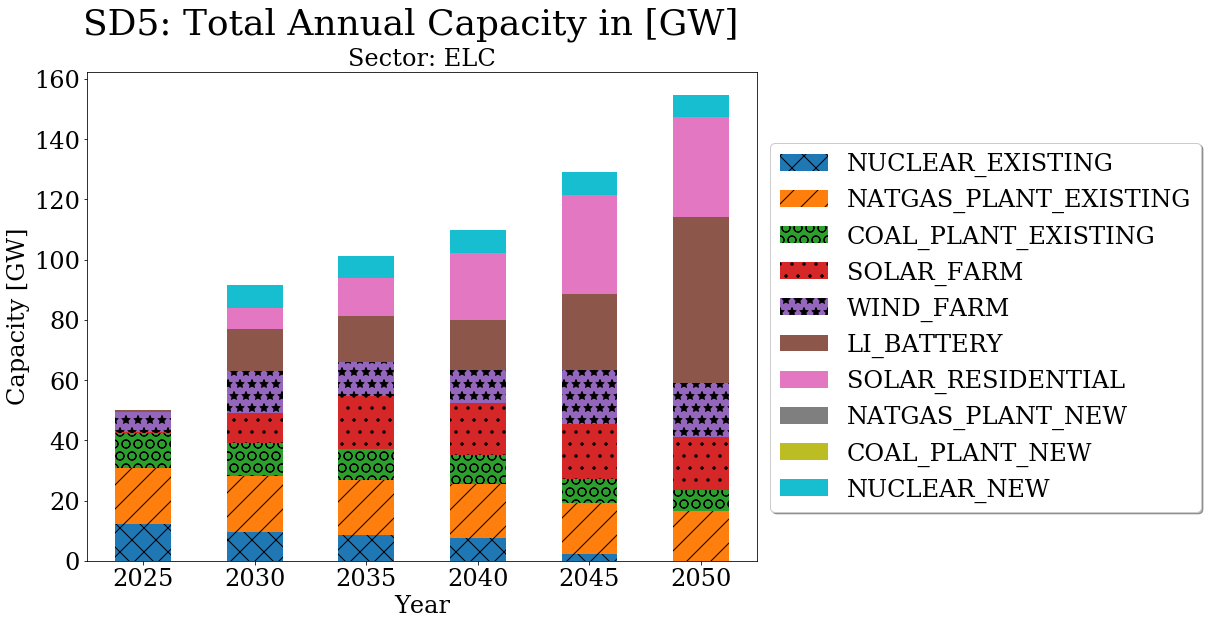

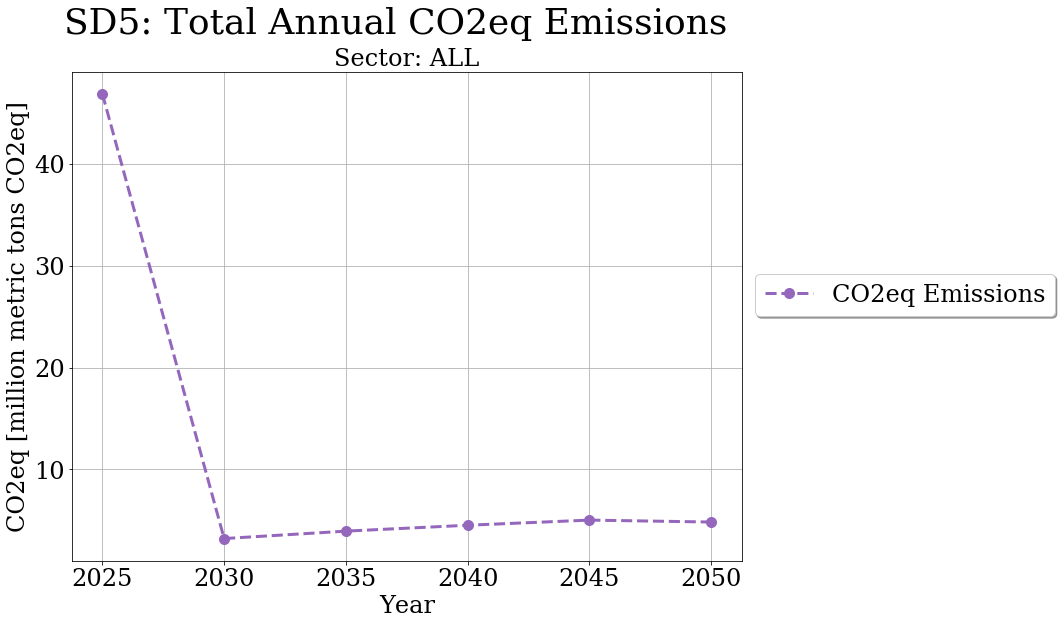

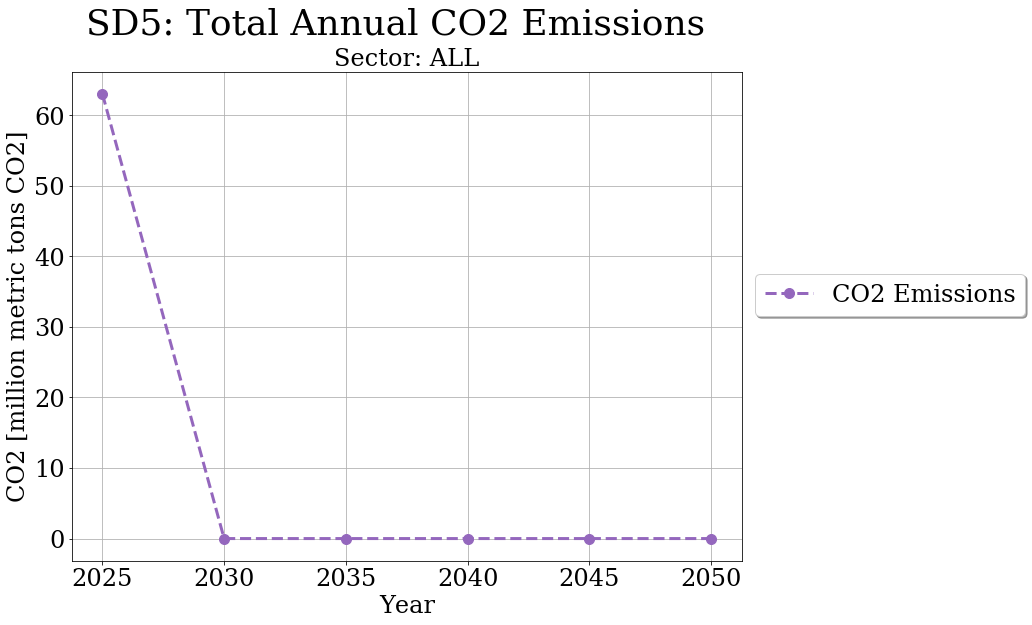

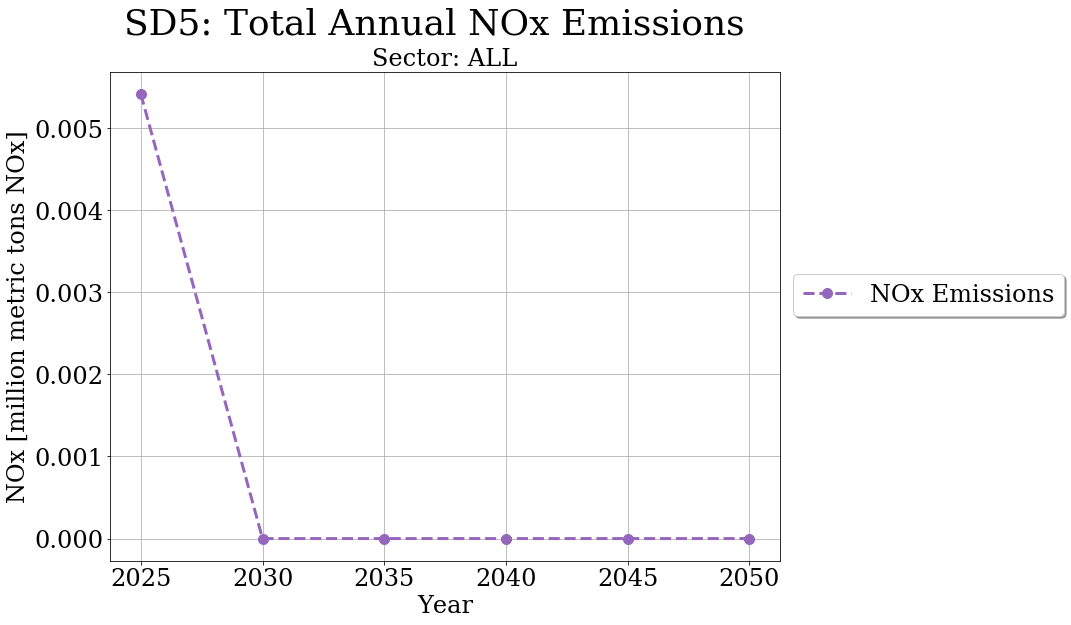

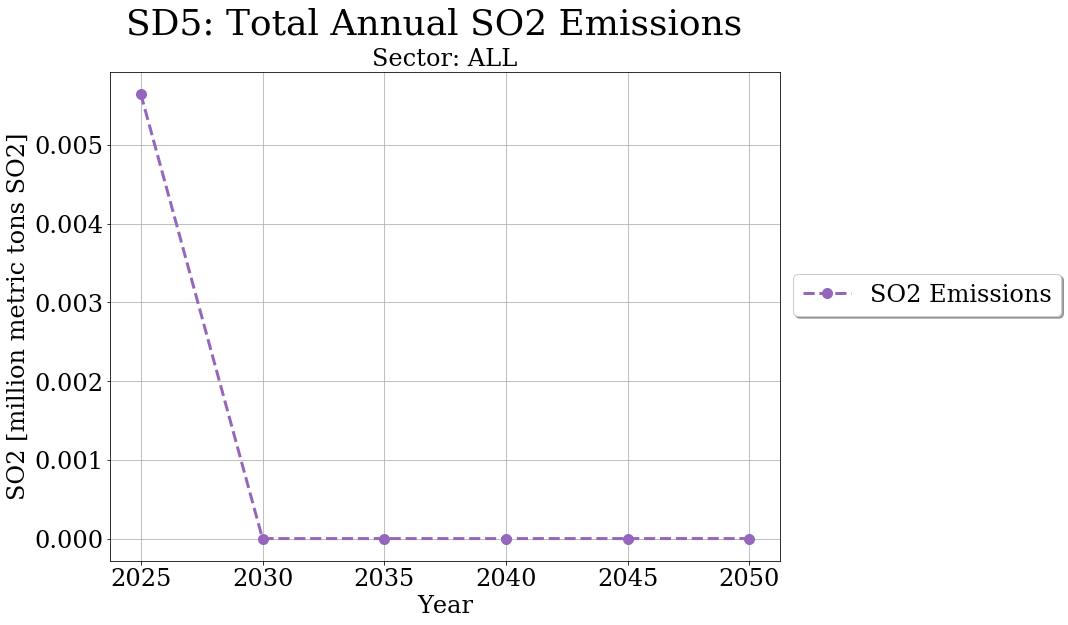

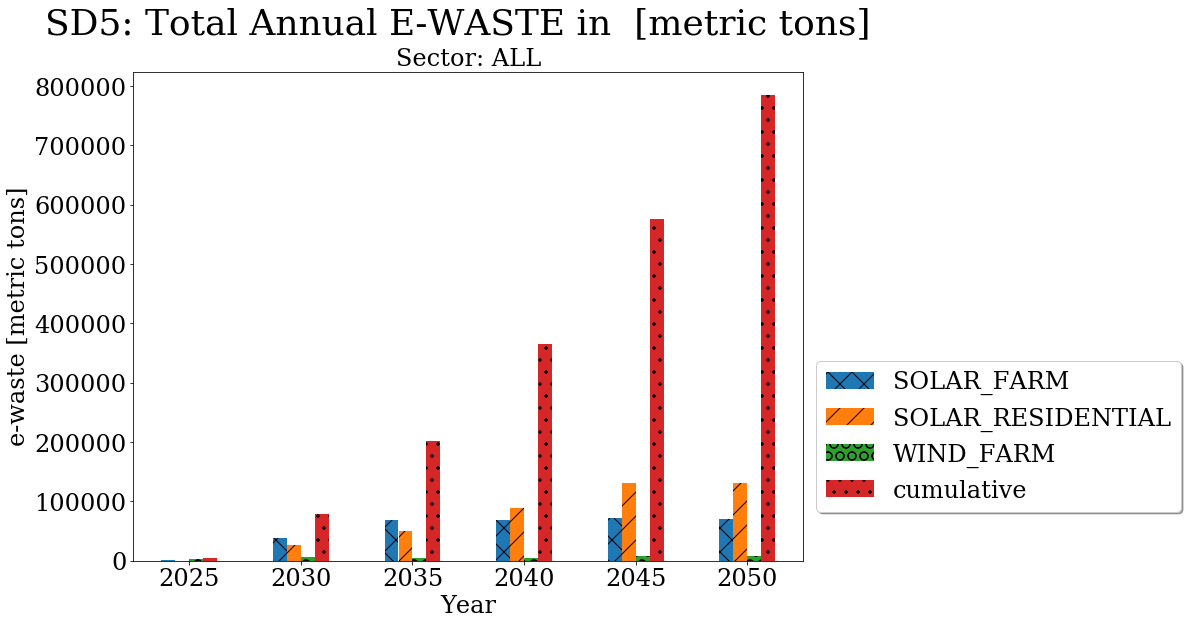

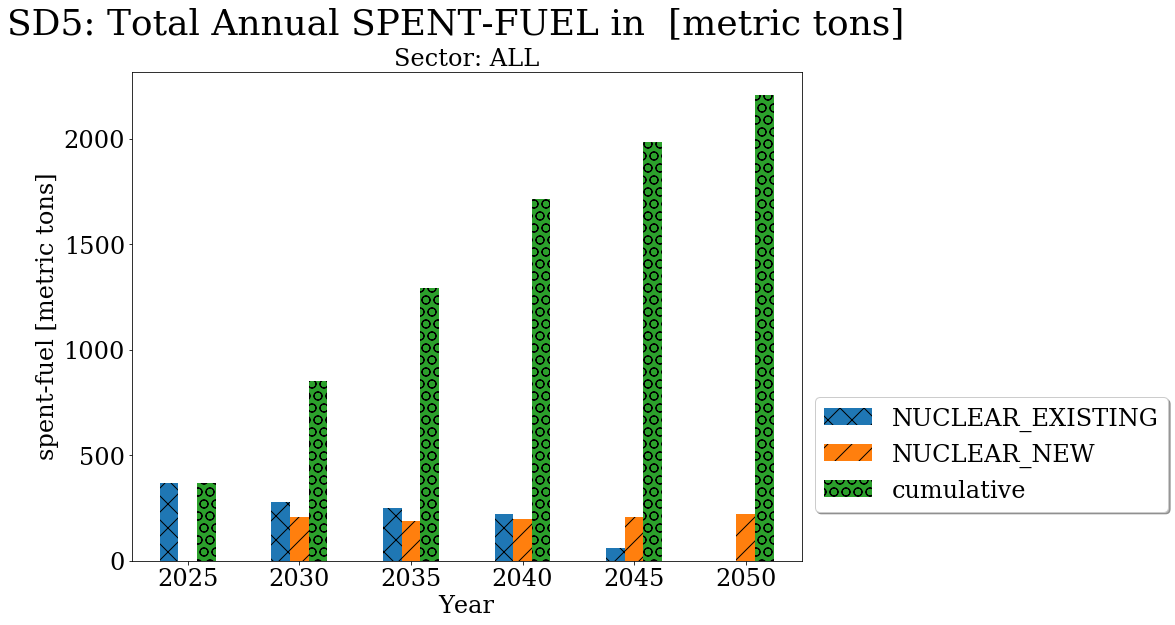

In [52]:
scenario = 'SD5'
scenario_list = [f for f in file_list if scenario in f]
sd5_dfs = make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False) 

## Scenario: SD6

* Nuclear plants remain open through 2050
* Zero carbon emissions allowed by 2030.

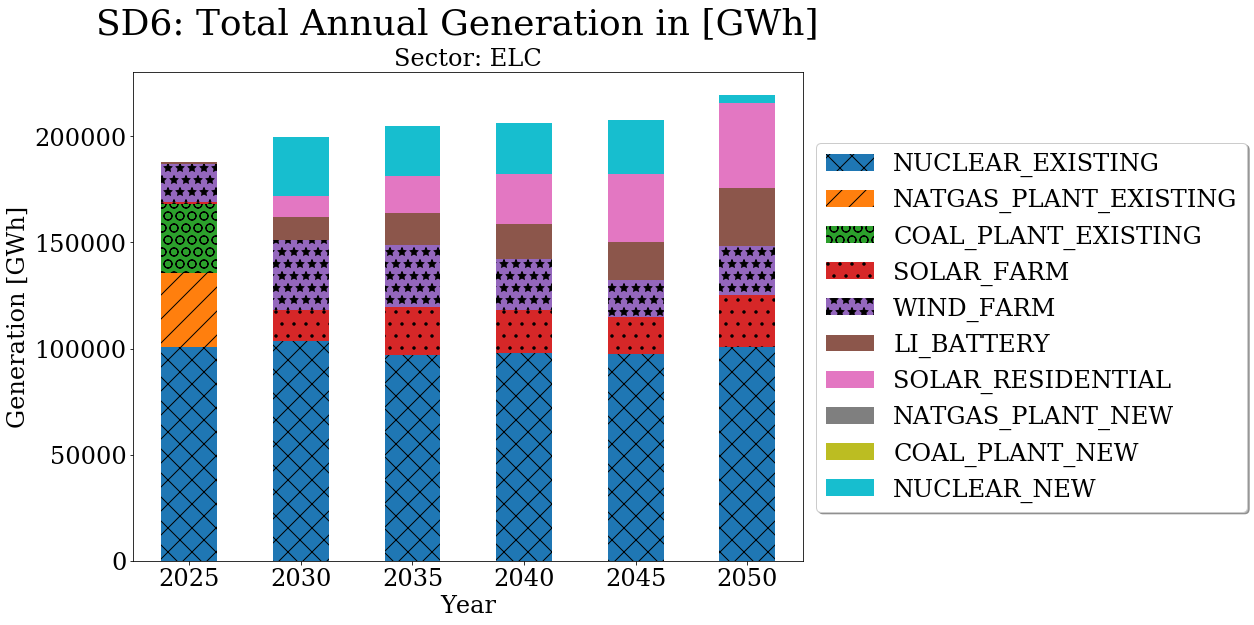

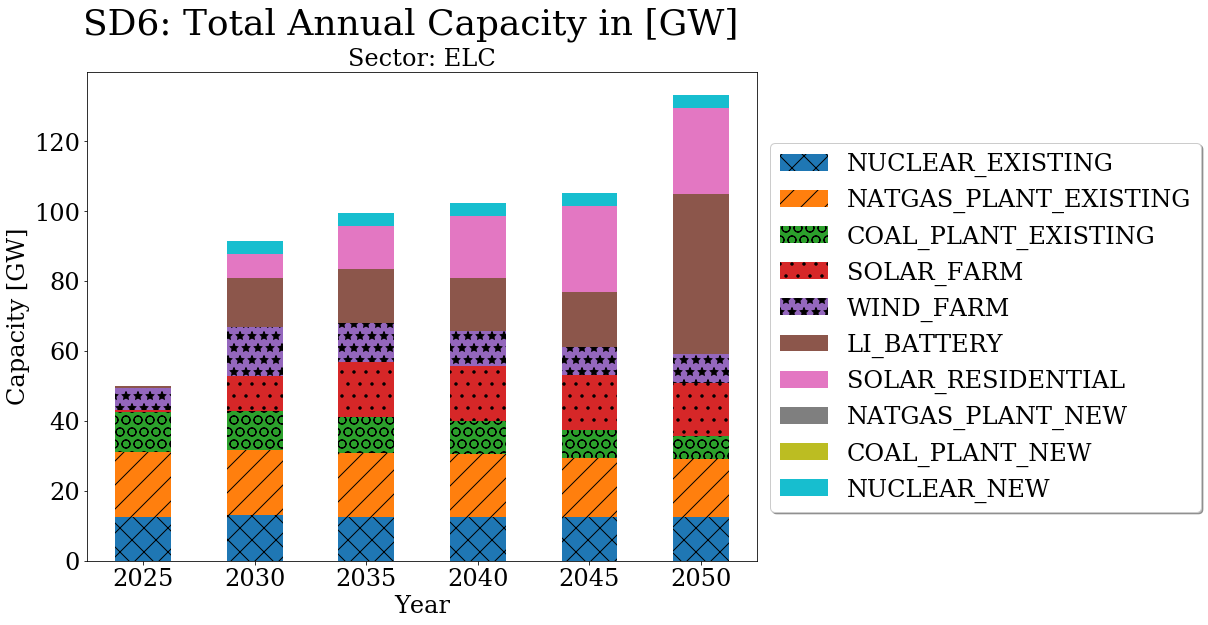

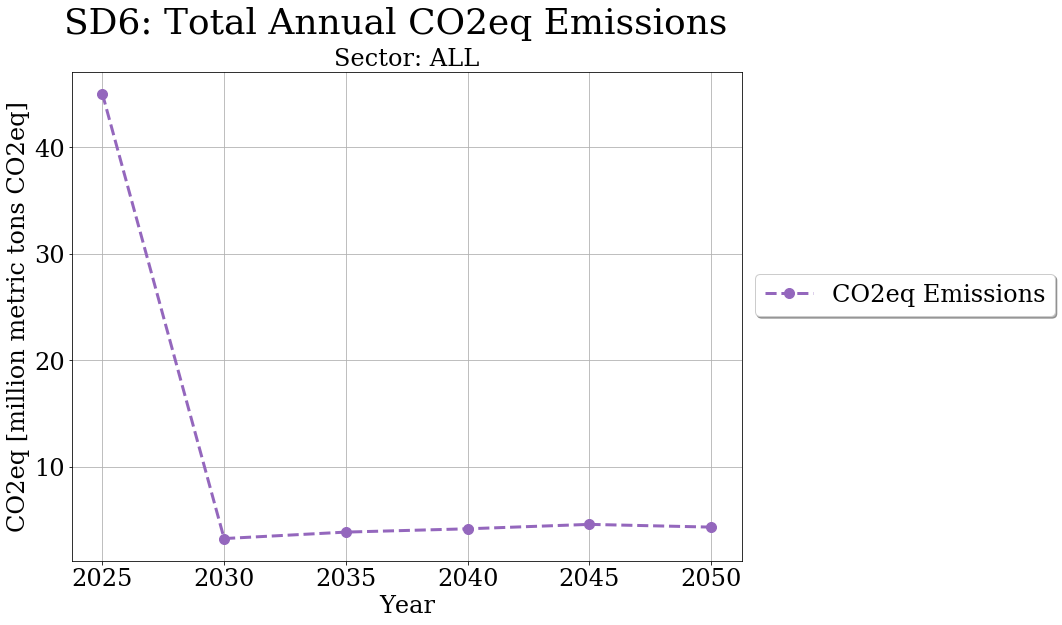

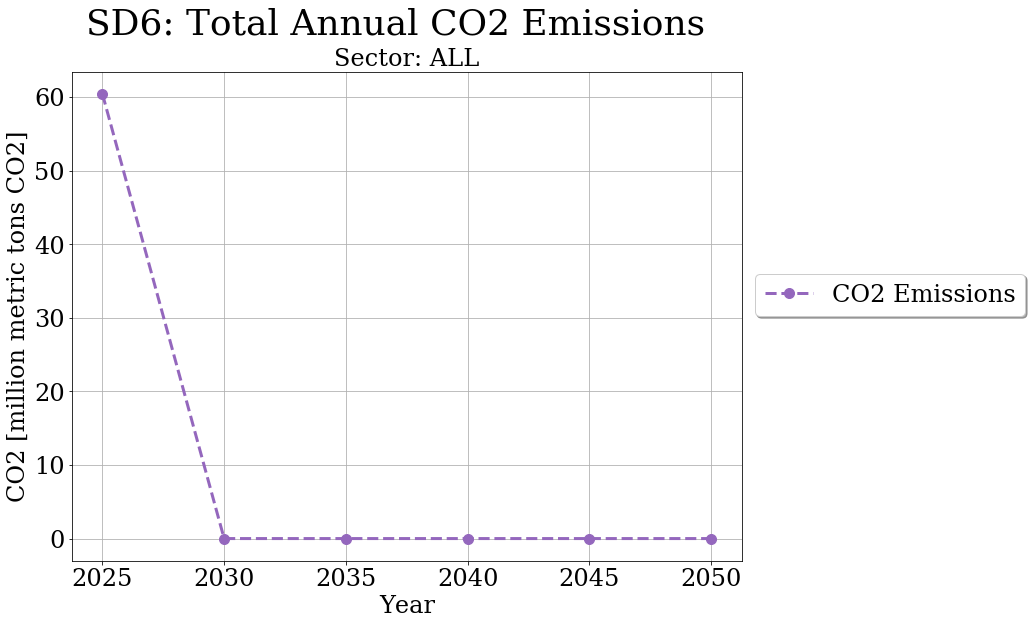

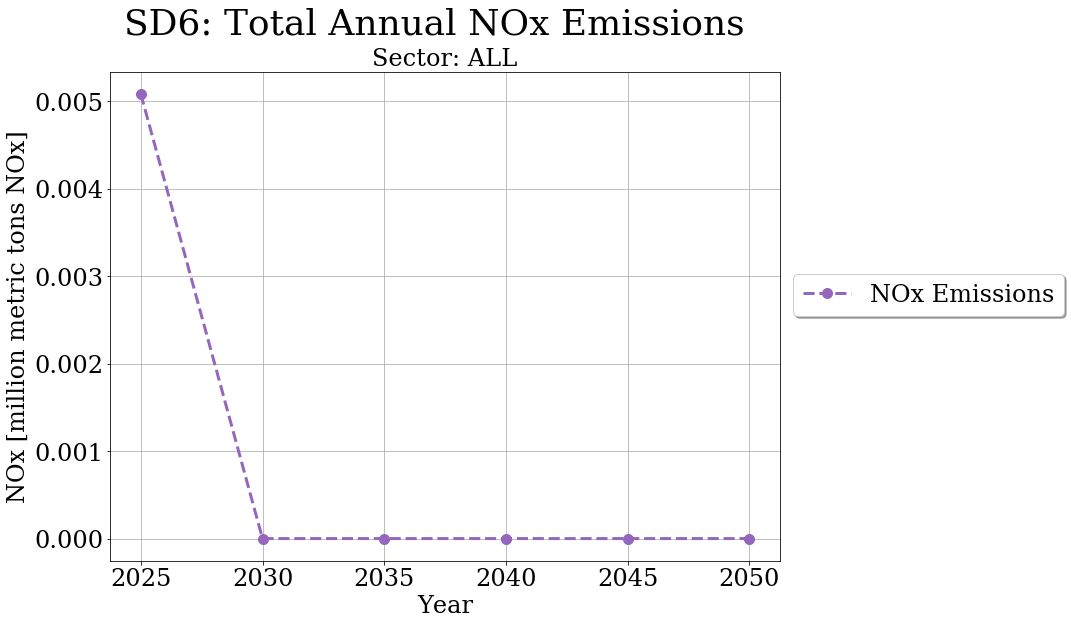

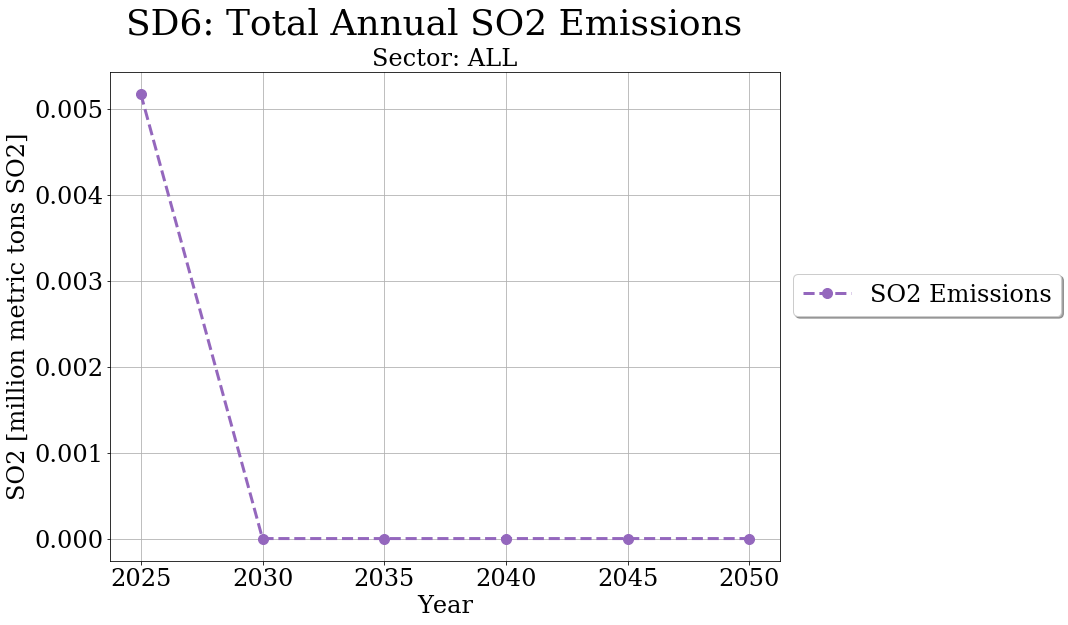

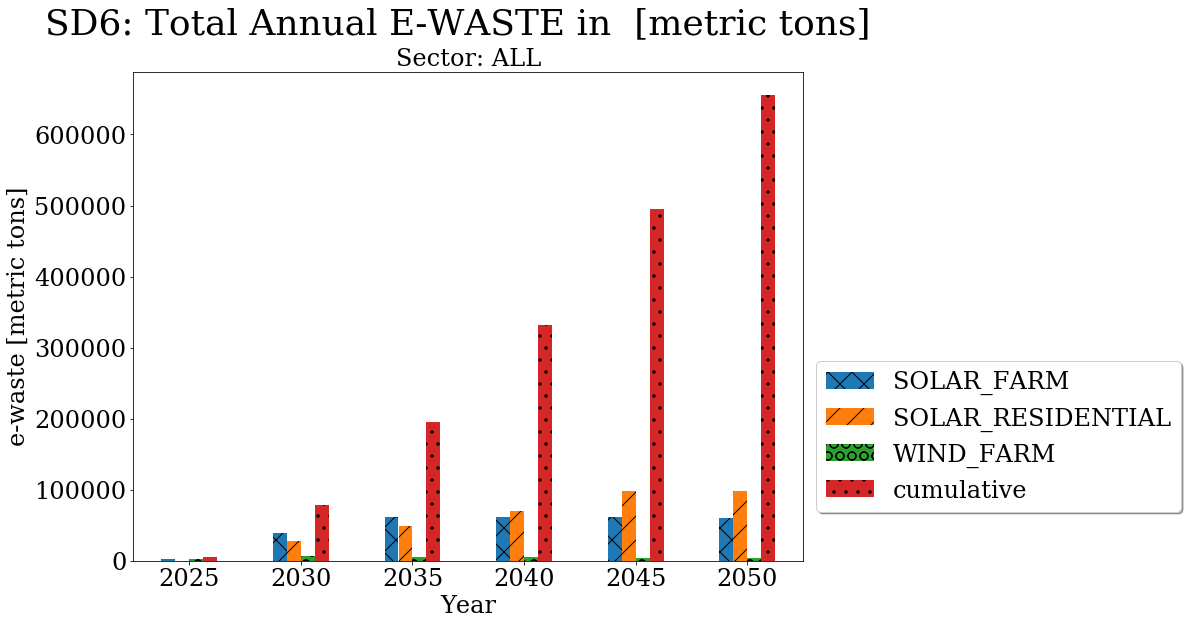

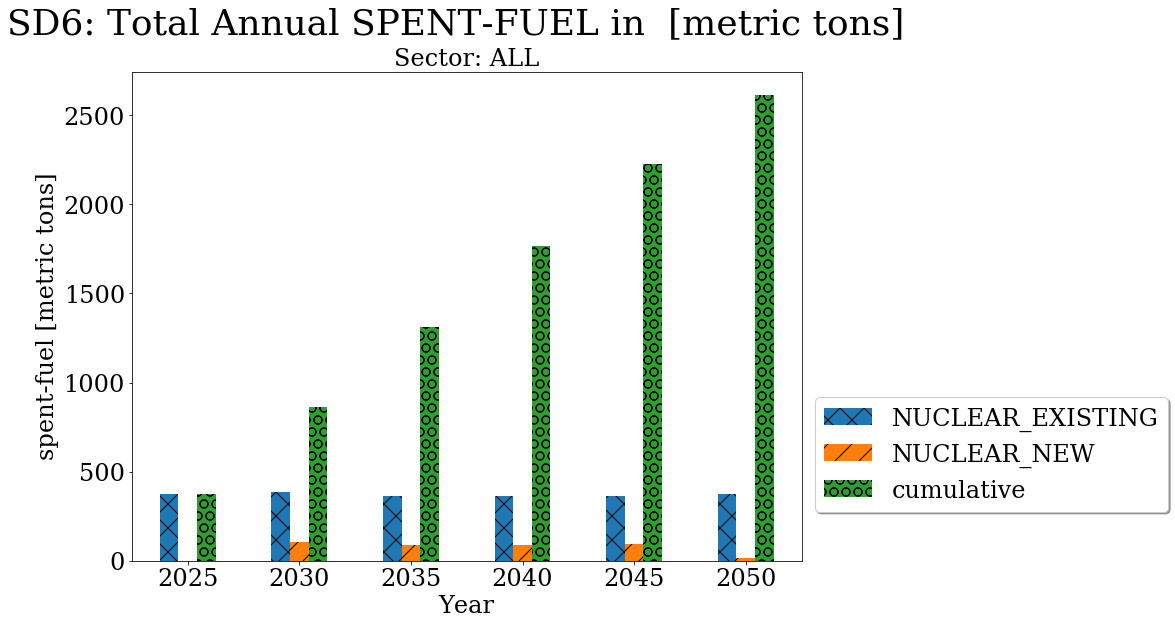

In [53]:
scenario = 'SD6'
scenario_list = [f for f in file_list if scenario in f]
sd5_dfs = make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False) 

In [54]:
def get_objective_value(file_list, scenarios=None):
    """
    This function retrieves the total cost objective functions
    for every scenario in the list of scenarios provided.

    Parameters
    ----------
    file_list : list
        The list of files with solution data.
    
    scenarios : list
        The list of scenarios considered.
        If None is given, all available log files will 
        be used.
        
    Returns
    -------
    objective_df : pandas dataframe
        A dataframe with all objectives.
    """
    
    # set up dictionary of scenarios
    objective_dict = {}

    for file in file_list: 
        datalines = parse_datalines(file)
        stop_at_line = 'Objective function value'
        scenario = get_scenario_name(file)
        objective_dict[scenario] = []
        for line in datalines:
            if stop_at_line in line:
                value_str = line.split()
                objective_dict[scenario].append(round(float(value_str[-1].strip("\'")),3))
                continue
    
    objective_df = pd.DataFrame(objective_dict)
    
    return objective_df    
#     return objective_dict

In [55]:
objectives = get_objective_value(file_list)
objectives

AN1          AN2           AN3           bau           SD2  \
0  5.787918e+07  61594129.56  6.474284e+07  3.081608e+07  3.742327e+07   

            SD3           SD4           SD5           SD6  
0  4.603857e+07  5.240278e+07  5.609586e+07  5.995806e+07

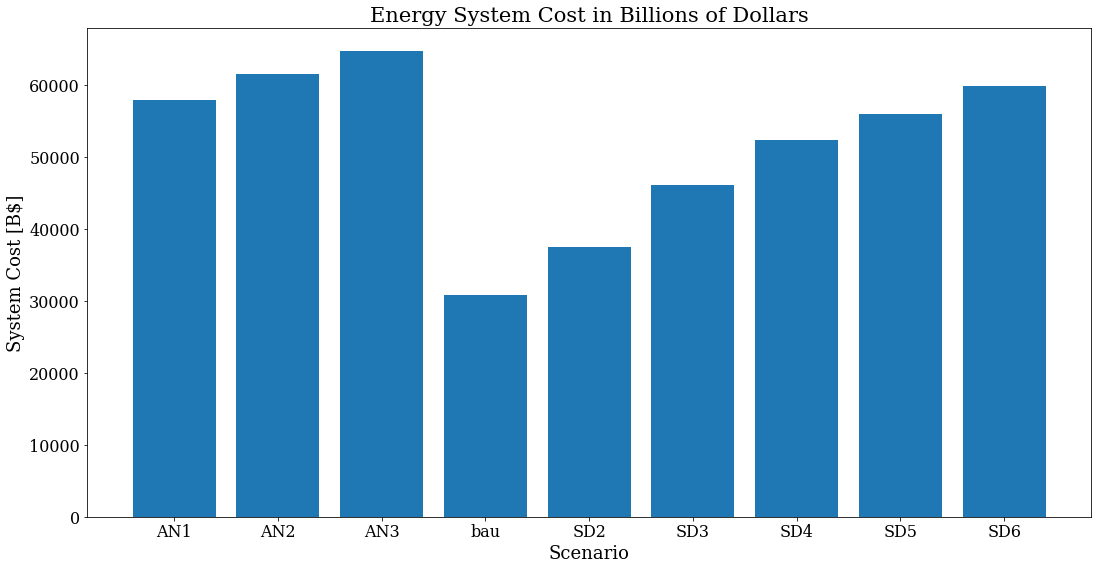

In [34]:
y = objectives.values.flatten()/1e3
x = np.array(objectives.keys())
plt.figure(figsize=(18,9))
plt.ylabel("System Cost [B$]", fontsize=18)
plt.xlabel("Scenario", fontsize=18)
plt.title("Energy System Cost in Billions of Dollars",fontsize=21)
plt.bar(x, np.array(y))
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

In [35]:
def compare_emissions(file_list, emission,scenarios=None):
    """
    This function compares GHG emissions across scenarios.
    """
    emissions_dict = {}
    for file in file_list:
        scenario_name = get_scenario_name(file)
        datalines = parse_datalines(file)
        df = create_dataframe(datalines, 
                              variable='emissions', 
                              name=f'{emission}_compare',
                              sector='all',
                              emission=emission)
        emissions_dict[scenario_name] = np.array(df.total)
    
    emissions_df = pd.DataFrame(emissions_dict)
    
    return emissions_df

In [36]:
df = compare_emissions(file_list[:], emission='CO2eq')

In [37]:
df

AN1        AN2        AN3         bau         SD2        SD3  \
0  57.322235  41.628956  40.853157   68.107597   45.081428  43.939314   
1   2.707320   2.729168   2.729190   74.321931   61.292039  44.863188   
2   2.711573   2.732302   2.731850   77.961737   68.516557  48.457010   
3   2.713796   2.734867   2.734868   82.393749   72.981828  50.619264   
4   2.718375   2.739003   2.739008   96.050427   94.168028  53.083169   
5   2.601364   2.715183   2.715196  100.451337  100.451338  51.867923   

         SD4        SD5        SD6  
0  67.339855  46.853058  45.036572  
1   3.209776   3.218061   3.230605  
2   3.845733   3.878635   3.588373  
3   4.399348   4.443254   3.832334  
4   4.895738   4.945637   4.263213  
5   4.541340   5.506466   4.264877

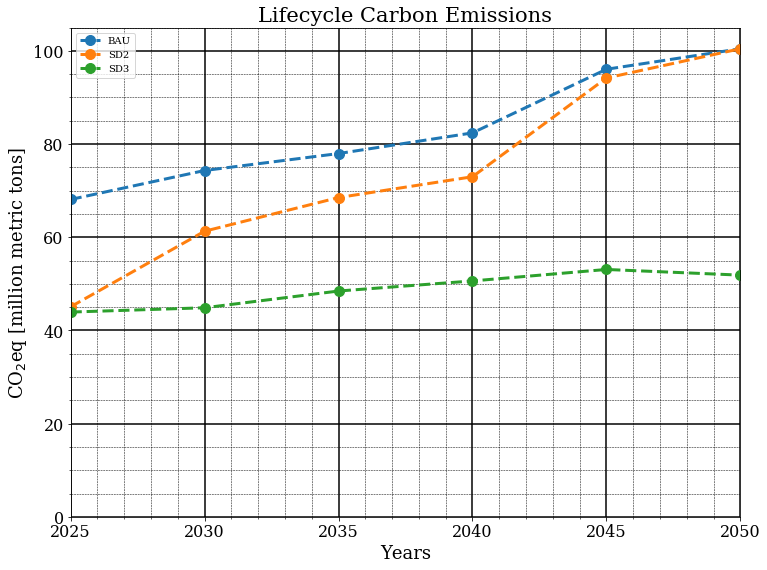

In [38]:
plt.figure(figsize=(12,9))
years = np.arange(2025,2051,5)
plt.plot(years, df['bau'], marker='o',lw=3, markersize=10, linestyle='--',label='BAU')
plt.plot(years, df['SD2'], marker='o',lw=3, markersize=10, linestyle='--',label='SD2')
plt.plot(years, df['SD3'], marker='o',lw=3, markersize=10, linestyle='--',label='SD3')
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.xlabel('Years', fontsize=18)
plt.ylabel(r'CO$_2$eq [million metric tons]', fontsize=18)
plt.title("Lifecycle Carbon Emissions", fontsize=21)
plt.ylim(0,105)
plt.xlim(2025,2050)
plt.legend()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

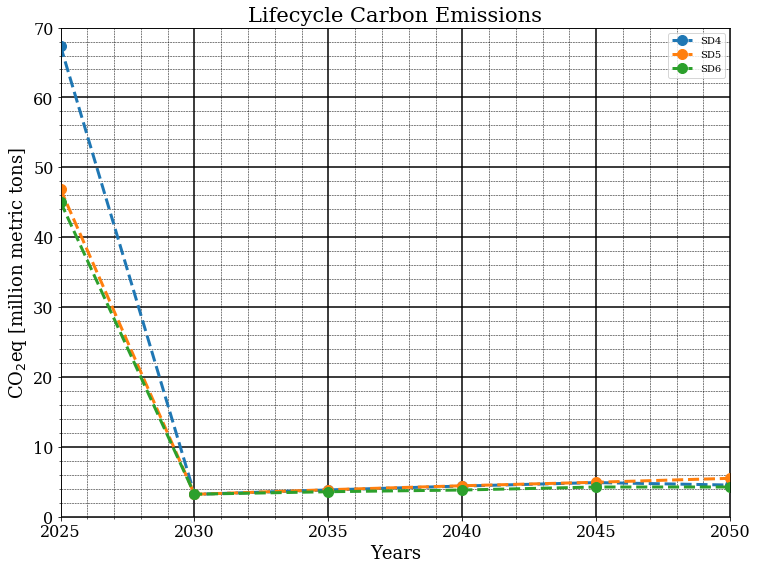

In [39]:
plt.figure(figsize=(12,9))
years = np.arange(2025,2051,5)
plt.plot(years, df['SD4'], marker='o',lw=3, markersize=10, linestyle='--',label='SD4')
plt.plot(years, df['SD5'], marker='o',lw=3, markersize=10, linestyle='--',label='SD5')
plt.plot(years, df['SD6'], marker='o',lw=3, markersize=10, linestyle='--',label='SD6')
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.xlabel('Years', fontsize=18)
plt.ylabel(r'CO$_2$eq [million metric tons]', fontsize=18)
plt.title("Lifecycle Carbon Emissions", fontsize=21)
plt.ylim(0,70)
plt.xlim(2025,2050)
plt.legend()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

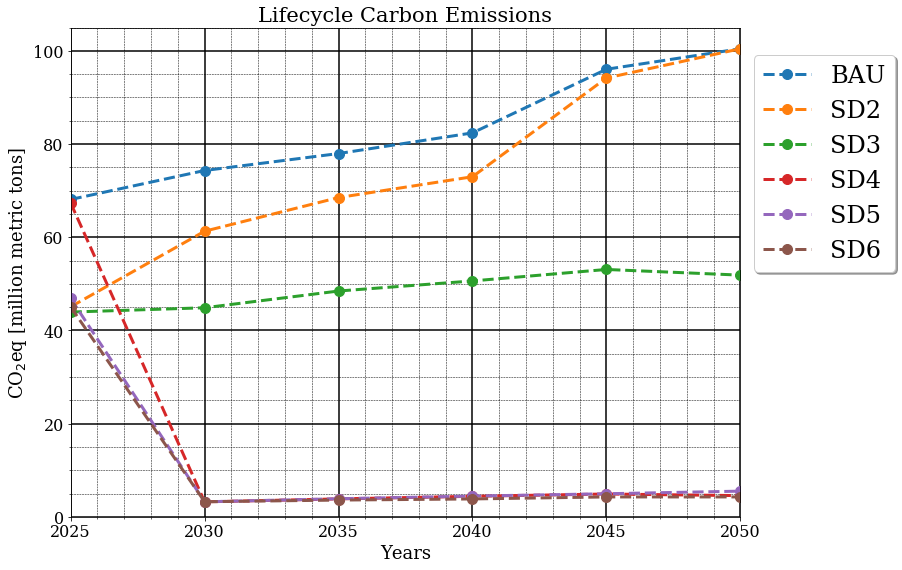

In [40]:
plt.figure(figsize=(12,9))
years = np.arange(2025,2051,5)
plt.plot(years, df['bau'], marker='o',lw=3, markersize=10, linestyle='--',label='BAU')
plt.plot(years, df['SD2'], marker='o',lw=3, markersize=10, linestyle='--',label='SD2')
plt.plot(years, df['SD3'], marker='o',lw=3, markersize=10, linestyle='--',label='SD3')
plt.plot(years, df['SD4'], marker='o',lw=3, markersize=10, linestyle='--',label='SD4')
plt.plot(years, df['SD5'], marker='o',lw=3, markersize=10, linestyle='--',label='SD5')
plt.plot(years, df['SD6'], marker='o',lw=3, markersize=10, linestyle='--',label='SD6')
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.xlabel('Years', fontsize=18)
plt.ylabel(r'CO$_2$eq [million metric tons]', fontsize=18)
plt.title("Lifecycle Carbon Emissions", fontsize=21)
plt.ylim(0,105)
plt.xlim(2025,2050)
plt.legend(loc=(1.02, 0.5), fancybox=True, shadow=True,
              fontsize=12, prop={'size': 24})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

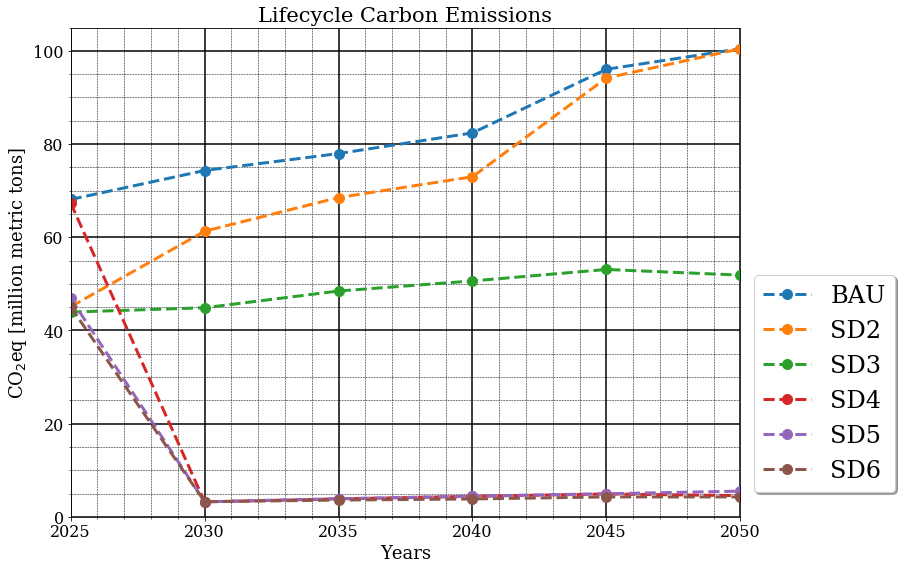

In [41]:
plt.figure(figsize=(12,9))
years = np.arange(2025,2051,5)
plt.plot(years, df['bau'], marker='o',lw=3, markersize=10, linestyle='--',label='BAU')
plt.plot(years, df['SD2'], marker='o',lw=3, markersize=10, linestyle='--',label='SD2')
plt.plot(years, df['SD3'], marker='o',lw=3, markersize=10, linestyle='--',label='SD3')
plt.plot(years, df['SD4'], marker='o',lw=3, markersize=10, linestyle='--',label='SD4')
plt.plot(years, df['SD5'], marker='o',lw=3, markersize=10, linestyle='--',label='SD5')
plt.plot(years, df['SD6'], marker='o',lw=3, markersize=10, linestyle='--',label='SD6')
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.xlabel('Years', fontsize=18)
plt.ylabel(r'CO$_2$eq [million metric tons]', fontsize=18)
plt.title("Lifecycle Carbon Emissions", fontsize=21)
plt.ylim(0,105)
plt.xlim(2025,2050)
plt.legend(loc=(1.02, 0.05), fancybox=True, shadow=True,
              fontsize=12, prop={'size': 24})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

In [42]:
diff_carboncap1 = (df['SD4']-df['SD6']).sum()
diff_carboncap2 = (df['SD5']-df['SD6']).sum()
diff_carboncap3 = (df['SD4']-df['SD5']).sum()

print(f"Keeping the plants open until their scheduled closure avoids {round(diff_carboncap3,3)} million metric tons of CO2eq.")
print(f"Keeping the plants open through 2050 avoids {round(diff_carboncap1,3)} million metric tons of CO2eq.")
print(f"Not letting the plants close at all avoids {round(diff_carboncap2,3)} million metric tons more than letting them close at the scheduled time.")

Keeping the plants open until their scheduled closure avoids 19.387 million metric tons of CO2eq.
Keeping the plants open through 2050 avoids 24.016 million metric tons of CO2eq.
Not letting the plants close at all avoids 4.629 million metric tons more than letting them close at the scheduled time.


In [43]:
diff_nocarboncap1 = (df['bau']-df['SD3']).sum()
diff_nocarboncap2 = (df['bau']-df['SD2']).sum()
diff_nocarboncap3 = (df['SD2']-df['SD3']).sum()

print(f"Keeping the plants open until their scheduled closure avoids {round(diff_nocarboncap2,3)} million metric tons of CO2eq.")
print(f"Keeping the plants open through 2050 avoids {round(diff_nocarboncap1,3)} million metric tons of CO2eq.")
print(f"Not letting the plants close at all avoids {round(diff_nocarboncap3,3)} million metric tons more than letting them close at the scheduled time.")

Keeping the plants open until their scheduled closure avoids 56.796 million metric tons of CO2eq.
Keeping the plants open through 2050 avoids 206.457 million metric tons of CO2eq.
Not letting the plants close at all avoids 149.661 million metric tons more than letting them close at the scheduled time.


The EPA has a neat [calculator](https://www.epa.gov/energy/greenhouse-gas-equivalencies-calculator) to compare the equivalent carbon emissions.

Keeping all of the nuclear plants open until their licenses expires is the same as taking 36 million cars off the road for one year. Keeping them open until 2050 is equivalent to keeping a further 12 million cars off the road.

## Land Use Change in Illinois


1. Get the final capacity in 2050 of each generation type.
2. Calculate the required new land using the known power density of each type of generation.
3. Plot the land use change (bar plot?) in total area (square km) and as a percentage of Illinois area.

In [44]:
existing_cap = pd.DataFrame({'type':['wind', 'solar', 'natgas',
                                      'natgas_ccs', 'coal', 
                                      'coal_ccs','nuclear', 
                                      'storage','nuclear-gen4', 'solar-residential'],
                'ex_cap_MW':[6325.9,116.3,18623.5, 0.0,11564.0, 0.0,12431.0, 137.0, 0.0, 0.0]})
existing_cap

type  ex_cap_MW
0               wind     6325.9
1              solar      116.3
2             natgas    18623.5
3         natgas_ccs        0.0
4               coal    11564.0
5           coal_ccs        0.0
6            nuclear    12431.0
7            storage      137.0
8       nuclear-gen4        0.0
9  solar-residential        0.0

There is insufficient data to evaluate the land use requirements for battery storage. Thus the land use requirements are likely underestimates in the renewables heavy scenarios.

In [45]:
power_density = pd.DataFrame({'type':['wind', 'solar', 'natgas',
                                      'natgas_ccs', 'coal', 
                                      'coal_ccs','nuclear', 
                                      'storage','nuclear-gen4', 'solar-residential'],
                'power_density':[3.1,5.8,1283.9,1283.9,126.6,126.6,288.9, 12376,288.9,4.7]})
power_density

type  power_density
0               wind            3.1
1              solar            5.8
2             natgas         1283.9
3         natgas_ccs         1283.9
4               coal          126.6
5           coal_ccs          126.6
6            nuclear          288.9
7            storage        12376.0
8       nuclear-gen4          288.9
9  solar-residential            4.7

In [46]:
def get_final_capacity(file_list, scenarios=None):
    """
    This function retrieves the final capacity across 
    scenarios.
    """
    capacity_dict = {}
    for file in file_list:
        scenario_name = get_scenario_name(file)
        datalines = parse_datalines(file)
        df = create_dataframe(datalines, 
                              variable='capacity', 
                              name=f'final_capacity',
                              sector='elc',
                              emission=None)
        final_year = df.index[-1]
        df = df[df.index == final_year]
        data = np.array([df['WIND_FARM'].values[0],
                         df['SOLAR_FARM'].values[0],
                         df['NATGAS_PLANT_EXISTING'].values[0]+df['NATGAS_PLANT_NEW'].values[0],
                         df['NATGAS_PLANT_NEW'].values[0],
                         df['COAL_PLANT_EXISTING'].values[0],
                         df['COAL_PLANT_NEW'].values[0],
                         df['NUCLEAR_EXISTING'].values[0],
                         df['LI_BATTERY'].values[0],
                         df['NUCLEAR_NEW'].values[0],
                         df['SOLAR_RESIDENTIAL'].values[0],
                         ])
        capacity_dict[scenario_name] = data
    
    capacity_df = pd.DataFrame(capacity_dict)
    
    return capacity_df 

In [47]:
capacity_df = get_final_capacity(file_list)
capacity_df

AN1         AN2         AN3         bau         SD2         SD3  \
0      0.00000      0.0000      0.0000      0.0000      0.0000      0.0000   
1    527.13504   2489.4488   2489.4488      0.0000      0.0000      0.0000   
2  18441.44700  16621.9000  16621.9000  45663.4730  45663.4730  24756.7910   
3      0.00000      0.0000      0.0000      0.0000      0.0000      0.0000   
4   6730.60000   6730.6000   6730.6000   6730.6000   6730.6000   6730.6000   
5      0.00000      0.0000      0.0000      0.0000      0.0000      0.0000   
6      0.00000      0.0000  12431.0000      0.0000      0.0000  12431.0000   
7   8233.56960   8822.8407   8822.8407      0.0000      0.0000      0.0000   
8  24349.80500  23879.5810  11448.5810      0.0000      0.0000      0.0000   
9   6500.00000   6500.0000   6500.0000   2329.3727   2329.3727   2329.3727   

         SD4        SD5         SD6  
0  13300.793  22367.715   8092.1500  
1  12505.637  15750.159  11050.7120  
2  16621.900  16621.900  16621.9000  
3      0.000      0.000      0.0000  
4   6730.600   6730.600   6730.6000  
5      0.000      0.000      0.0000  
6      0.000      0.000  12431.0000  
7  52560.000  23636.038  14996.5480  
8  10035.895   7408.907   4226.8188  
9  33000.000  44100.000  24763.4160

In [48]:
battenergy = 29160*4.87
battgeneration = 33733  # GWh

In [49]:
battenergy # MWh

142009.2

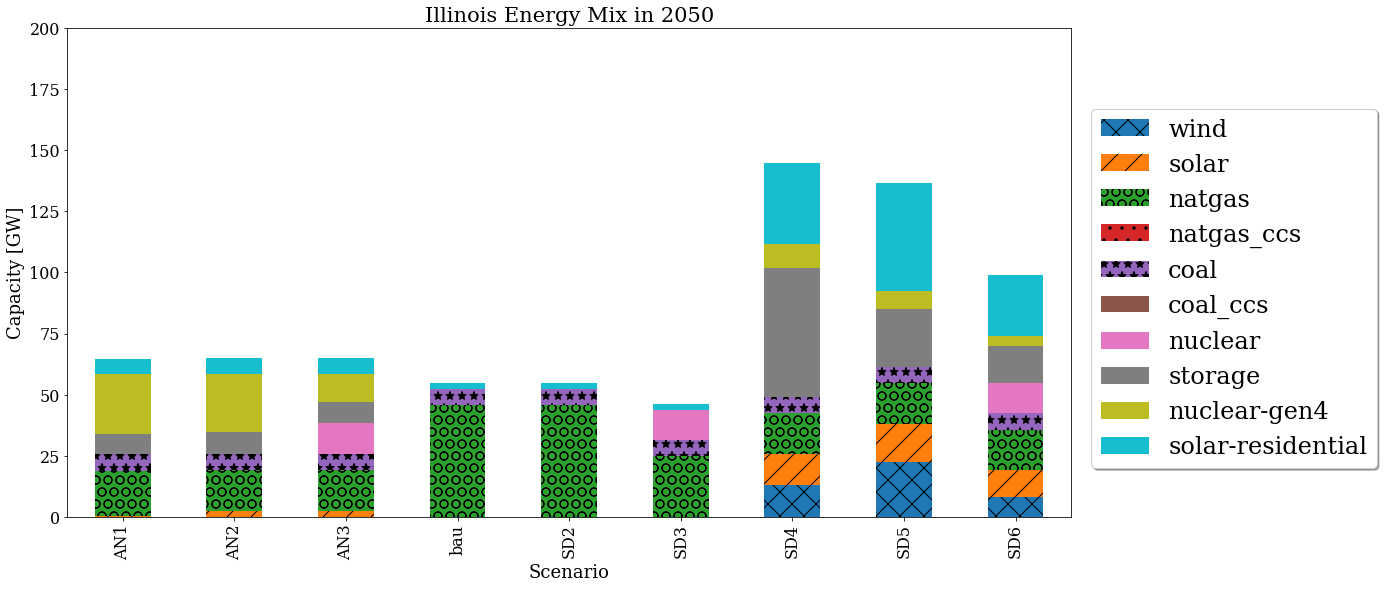

In [50]:
capacity_df.index = existing_cap.type
hatches = ''.join(h * len(capacity_df.T) for h in 'x/O.*')
ax = (capacity_df/1000).T.plot.bar(stacked=True, figsize=(18,9))
bars = ax.patches
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel('Capacity [GW]', fontsize=18)
plt.title('Illinois Energy Mix in 2050', fontsize=21)
plt.xlabel('Scenario',fontsize=18)
plt.ylim(0,200)
# ax.legend(fontsize=16)
ax.legend(loc=(1.02, 0.1), fancybox=True, shadow=True,
              fontsize=12, prop={'size': 24})
# plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
# plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

In [51]:
capacity_df

AN1         AN2         AN3         bau  \
type                                                                 
wind                   0.00000      0.0000      0.0000      0.0000   
solar                527.13504   2489.4488   2489.4488      0.0000   
natgas             18441.44700  16621.9000  16621.9000  45663.4730   
natgas_ccs             0.00000      0.0000      0.0000      0.0000   
coal                6730.60000   6730.6000   6730.6000   6730.6000   
coal_ccs               0.00000      0.0000      0.0000      0.0000   
nuclear                0.00000      0.0000  12431.0000      0.0000   
storage             8233.56960   8822.8407   8822.8407      0.0000   
nuclear-gen4       24349.80500  23879.5810  11448.5810      0.0000   
solar-residential   6500.00000   6500.0000   6500.0000   2329.3727   

                          SD2         SD3        SD4        SD5         SD6  
type                                                                         
wind                   0.0000      0.0000  13300.793  22367.715   8092.1500  
solar                  0.0000      0.0000  12505.637  15750.159  11050.7120  
natgas             45663.4730  24756.7910  16621.900  16621.900  16621.9000  
natgas_ccs             0.0000      0.0000      0.000      0.000      0.0000  
coal                6730.6000   6730.6000   6730.600   6730.600   6730.6000  
coal_ccs               0.0000      0.0000      0.000      0.000      0.0000  
nuclear                0.0000  12431.0000      0.000      0.000  12431.0000  
storage                0.0000      0.0000  52560.000  23636.038  14996.5480  
nuclear-gen4           0.0000      0.0000  10035.895   7408.907   4226.8188  
solar-residential   2329.3727   2329.3727  33000.000  44100.000  24763.4160

In [29]:
landUse_req = capacity_df.divide(np.array(power_density.power_density).T, axis='rows')
landUse_req

AN1          AN2          AN3         bau  \
type                                                                   
wind                  0.000000     0.000000     0.000000    0.000000   
solar                90.885352   429.215310   429.215310    0.000000   
natgas               14.363616    12.946413    12.946413   35.566222   
natgas_ccs            0.000000     0.000000     0.000000    0.000000   
coal                 53.164297    53.164297    53.164297   53.164297   
coal_ccs              0.000000     0.000000     0.000000    0.000000   
nuclear               0.000000     0.000000    43.028730    0.000000   
storage               0.665285     0.712899     0.712899    0.000000   
nuclear-gen4         84.284545    82.656909    39.628179    0.000000   
solar-residential  1382.978723  1382.978723  1382.978723  495.611213   

                          SD2         SD3          SD4          SD5  \
type                                                                  
wind                 0.000000    0.000000  4164.685161  7215.391935   
solar                0.000000    0.000000  1937.342414  2715.544655   
natgas              35.566222   19.282492    12.946413    12.946413   
natgas_ccs           0.000000    0.000000     0.000000     0.000000   
coal                53.164297   53.164297    53.164297    53.164297   
coal_ccs             0.000000    0.000000     0.000000     0.000000   
nuclear              0.000000   43.028730     0.000000     0.000000   
storage              0.000000    0.000000     4.246930     1.909829   
nuclear-gen4         0.000000    0.000000    33.083873    25.645230   
solar-residential  495.611213  495.611213  8014.217872  9382.978723   

                           SD6  
type                            
wind               2610.370968  
solar              1905.295172  
natgas               12.946413  
natgas_ccs            0.000000  
coal                 53.164297  
coal_ccs              0.000000  
nuclear              43.028730  
storage               1.211744  
nuclear-gen4         14.630733  
solar-residential  5268.811915

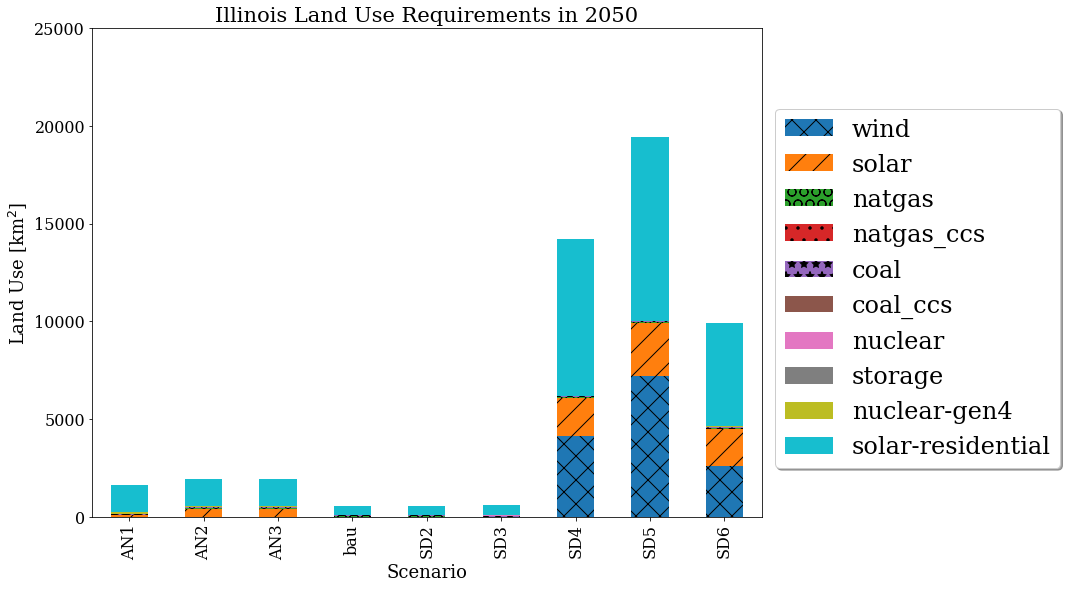

In [30]:
hatches = ''.join(h * len(landUse_req.T) for h in 'x/O.*')
ax = landUse_req.T.plot.bar(stacked=True)
bars = ax.patches
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel(r'Land Use [km$^2$]', fontsize=18)
plt.title('Illinois Land Use Requirements in 2050', fontsize=21)
plt.xlabel('Scenario',fontsize=18)
plt.ylim(0,25000)
ax.legend(loc=(1.02, 0.1), fancybox=True, shadow=True,
              fontsize=12, prop={'size': 24})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

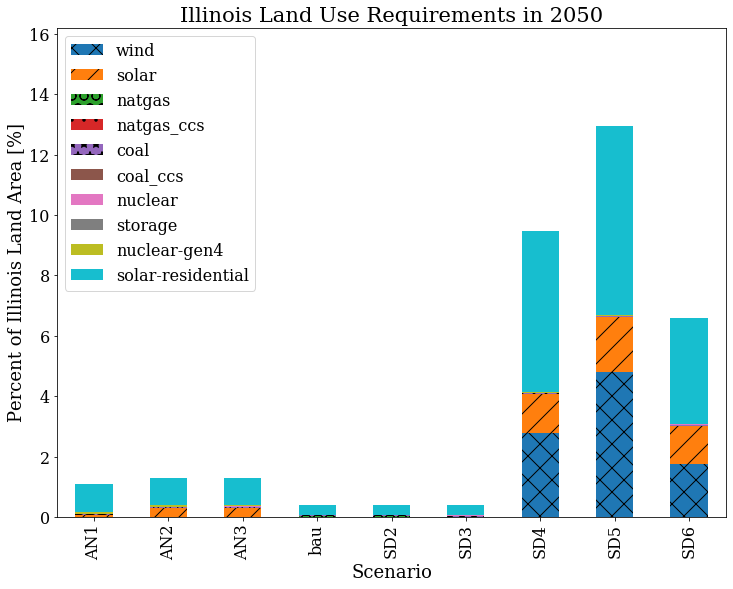

In [31]:
illinois_area = 149999.16  # km^2
hatches = ''.join(h * len(landUse_req.T) for h in 'x/O.*')
ax2 = (landUse_req/illinois_area*100).T.plot.bar(stacked=True)
bars = ax2.patches
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel(r'Percent of Illinois Land Area [%]', fontsize=18)
plt.title('Illinois Land Use Requirements in 2050', fontsize=21)
plt.xlabel('Scenario',fontsize=18)
plt.ylim(0,16.2)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax2.legend(fontsize=16)
plt.show()